# Robustness
Experimenting with changes to:
- bins
- before/after period

In [1]:
import preprocessing
from config import TRENDS_DIR
%load_ext autoreload
%autoreload 2
import pandas as pd
import tqdm
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta
from config import TWITTER_DATA_DIR
import pickle
import seaborn as sns
import statsmodels.formula.api as smf
import graphviz as gr
import warnings
import numpy as np
from trending import build_df, get_trend_behavior
warnings.filterwarnings('ignore')

In [6]:
import trending

In [2]:
campaigns = preprocessing.load_campaign()

In [3]:
hashtag = 'jharkhandwithmodi'
tweets = campaigns[hashtag]

In [4]:
with open(os.path.join(TWITTER_DATA_DIR, 'exposure_results.pkl'), 'rb') as f:
    exposures = pickle.load(f)

adj_date
2019-02-17 14:35:00   -10.0
2019-02-17 19:00:00    -2.0
2019-02-17 14:45:00    -2.0
2019-02-17 14:55:00    -2.0
2019-02-17 15:30:00    -2.0
                       ... 
2019-02-17 17:35:00     3.0
2019-02-17 14:40:00     3.0
2019-02-17 15:50:00     3.0
2019-02-17 14:25:00     9.0
2019-02-17 09:30:00     NaN
Name: username, Length: 229, dtype: float64


coef  std err      z  P>|z|  [0.025  \
Trial                                                                         
New Tweets Intercept                -18.4666    9.944 -1.857  0.063 -37.957   
           time_i                     0.3748    0.199  1.881  0.060  -0.016   
           threshold                 70.4155   37.536  1.876  0.061  -3.153   
           time_i:threshold          -1.0629    0.590 -1.803  0.071  -2.218   
           nonzero_exposure_regular   0.6207    0.309  2.006  0.045   0.014   

                                      0.975]  
Trial                                         
New Tweets Intercept                   1.024  
           time_i                      0.765  
           threshold                 143.984  
           time_i:threshold            0.093  
           nonzero_exposure_regular    1.227

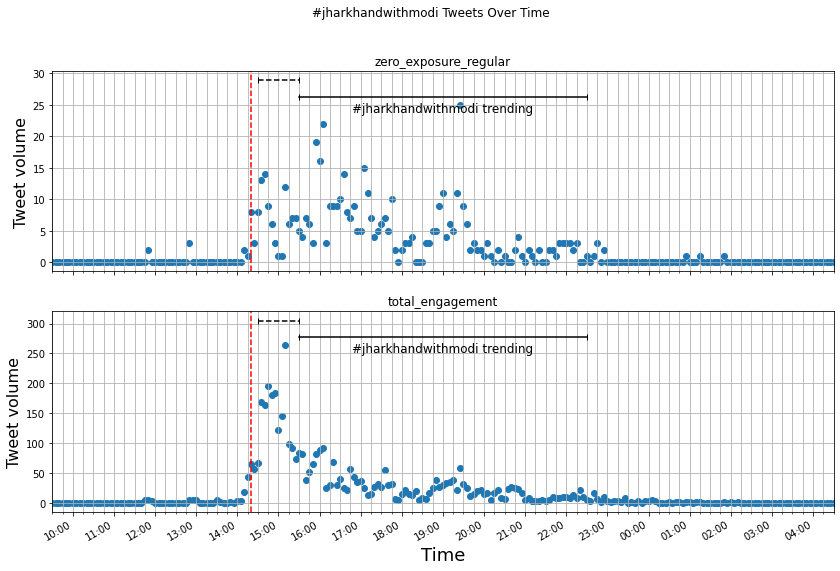

In [35]:
res = trending.run_statistics(
    *build_df(hashtag, tweets, exposures, time_bin='5Min', plot=True, cutoff_choice='best'), 
    periods=(12, 12))
res

Not enough periods in df, running on model from  2019-02-17 09:30:00 to 2019-02-17 19:15:00
merapmmeraabhimaan trended for more than 10 hours, defaulting to only plot first 10
dousupportnaxals trended for more than 10 hours, defaulting to only plot first 10
Not enough periods in df, running on model from  2018-09-04 11:00:00 to 2018-09-04 20:15:00
Not enough periods in df, running on model from  2019-04-22 08:35:00 to 2019-04-22 13:55:00
Not enough periods in df, running on model from  2019-01-06 17:25:00 to 2019-01-06 22:45:00
म्हारा_वोट_भाजपा_को trended for more than 10 hours, defaulting to only plot first 10
Not enough periods in df, running on model from  2018-12-05 10:15:00 to 2018-12-05 16:25:00
parakramparv trended for more than 10 hours, defaulting to only plot first 10
Not enough periods in df, running on model from  2018-09-28 05:30:00 to 2018-09-28 15:15:00
Not enough periods in df, running on model from  2019-02-21 09:45:00 to 2019-02-21 16:20:00
Not enough periods in df, r

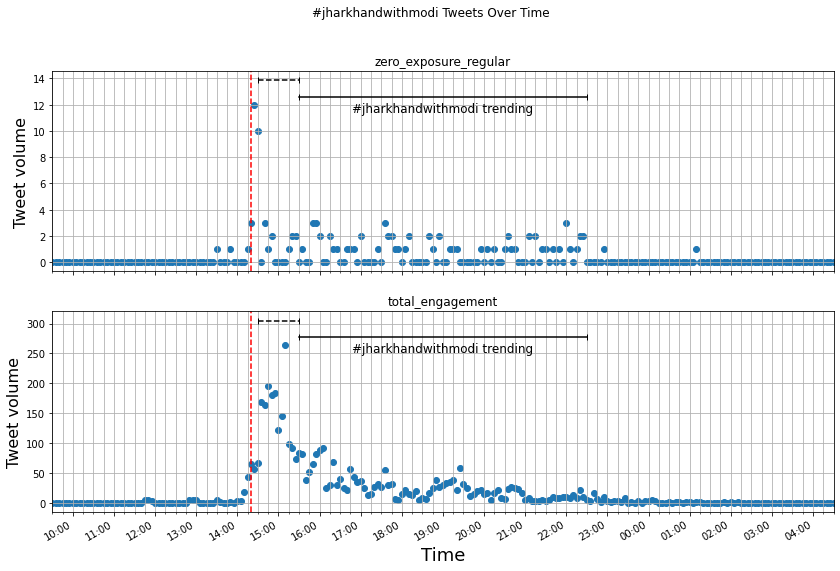

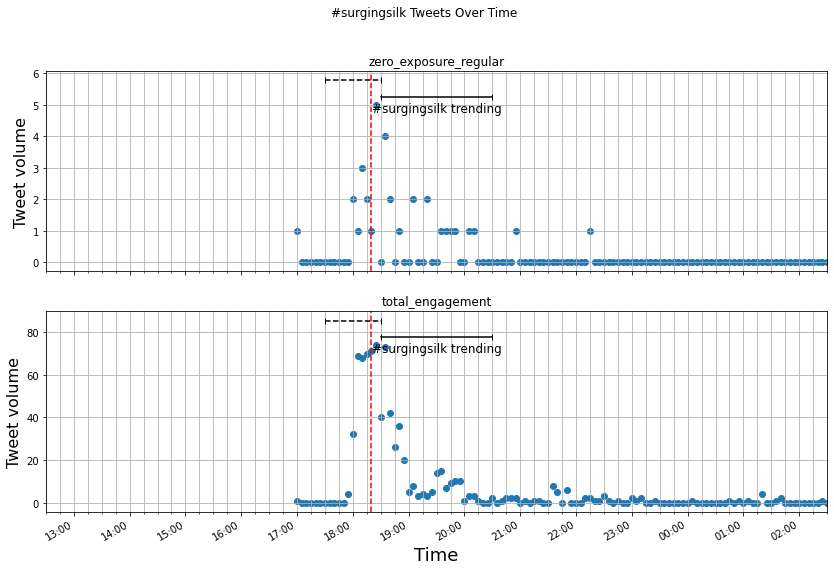

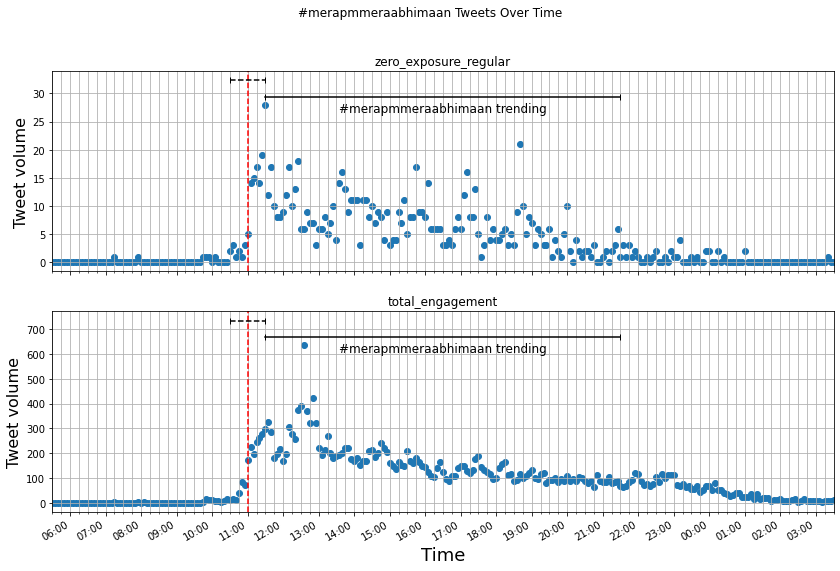

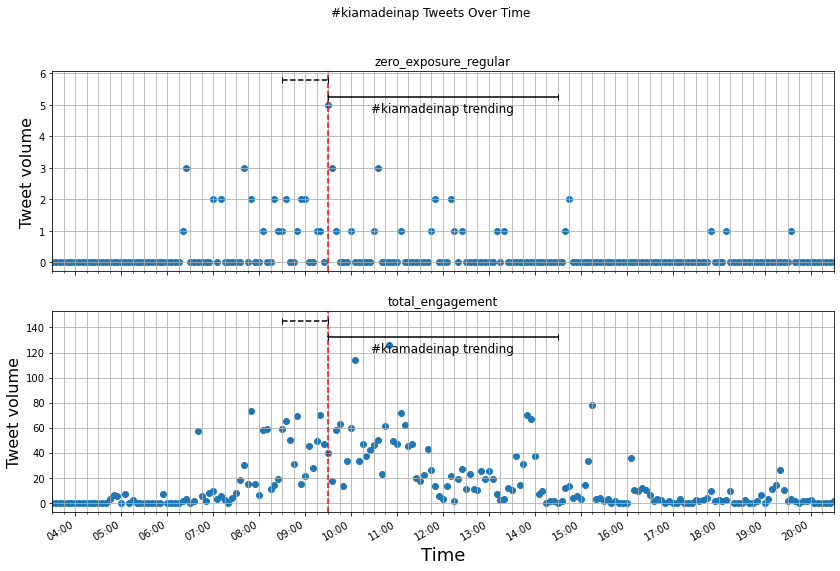

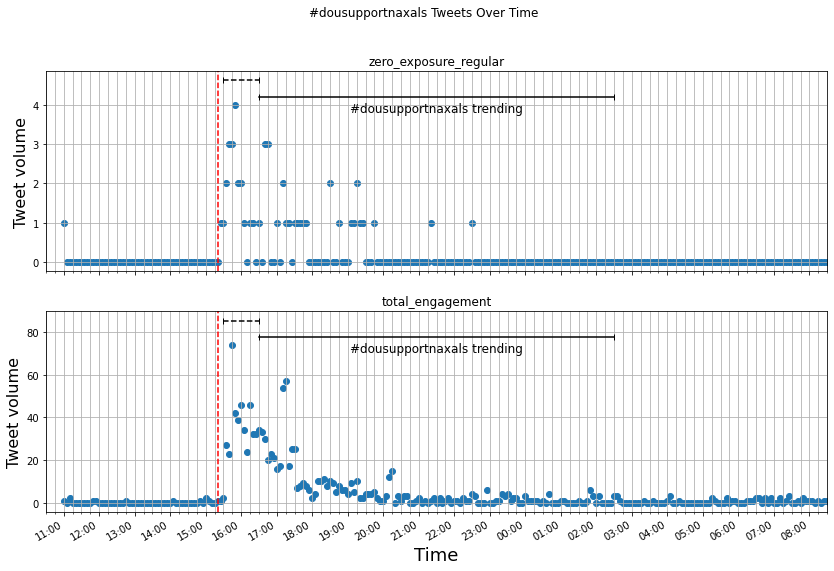

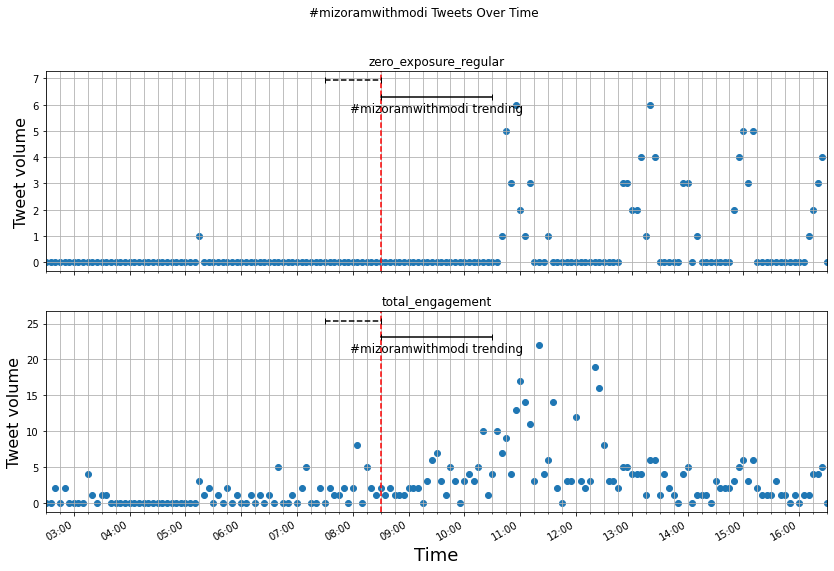

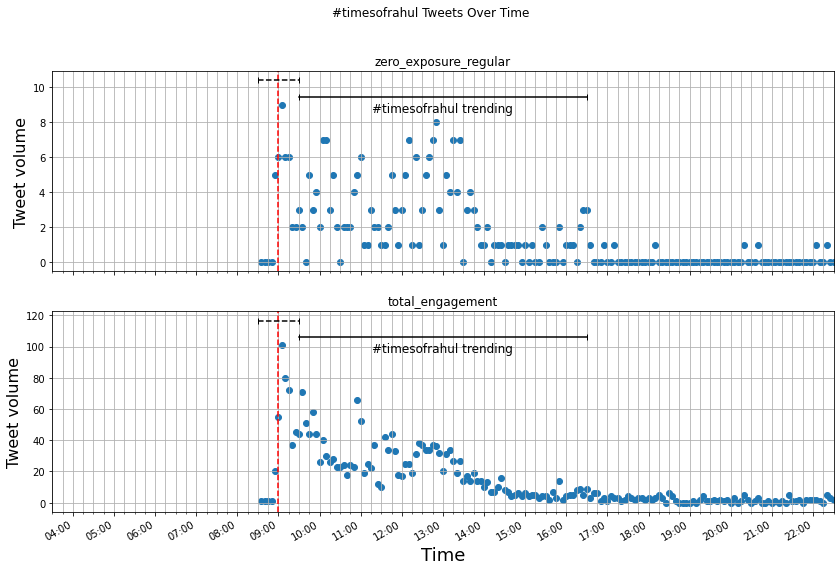

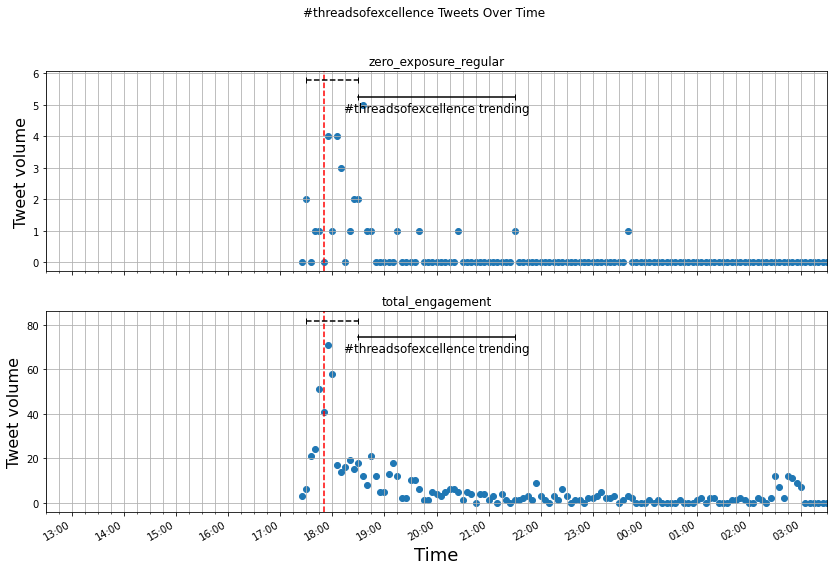

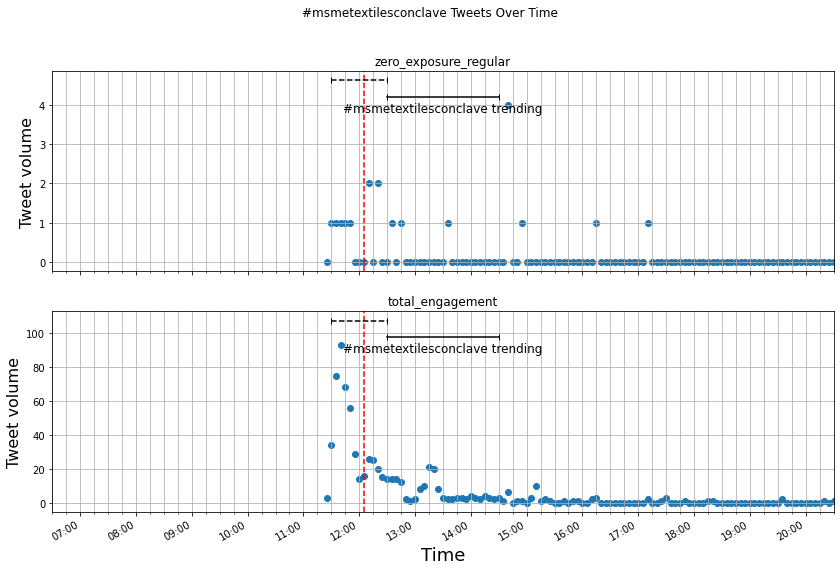

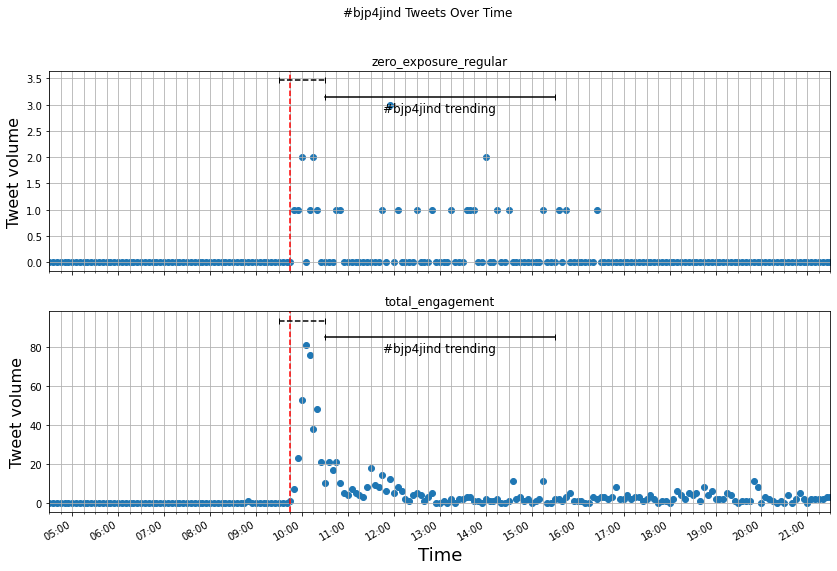

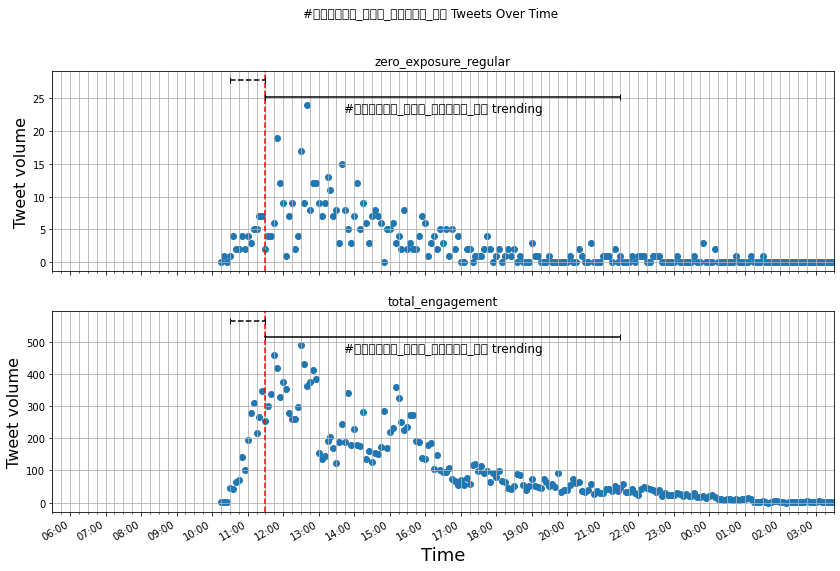

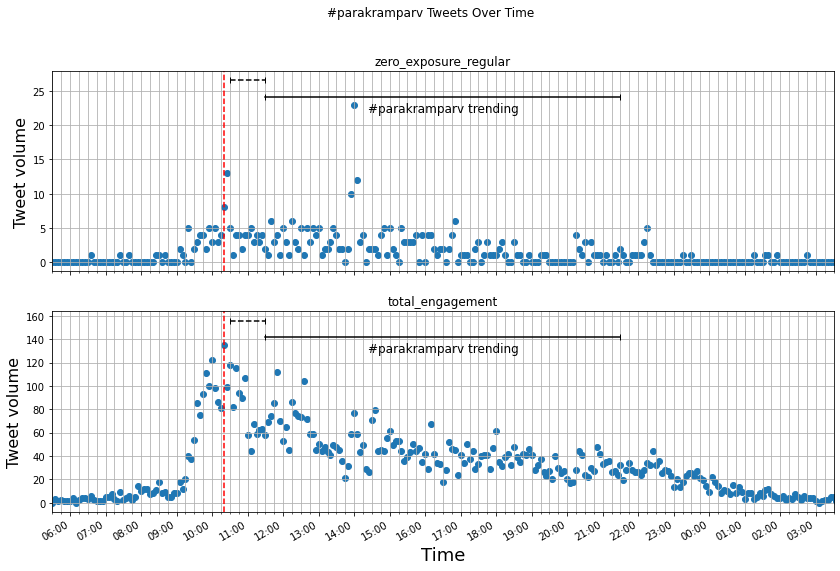

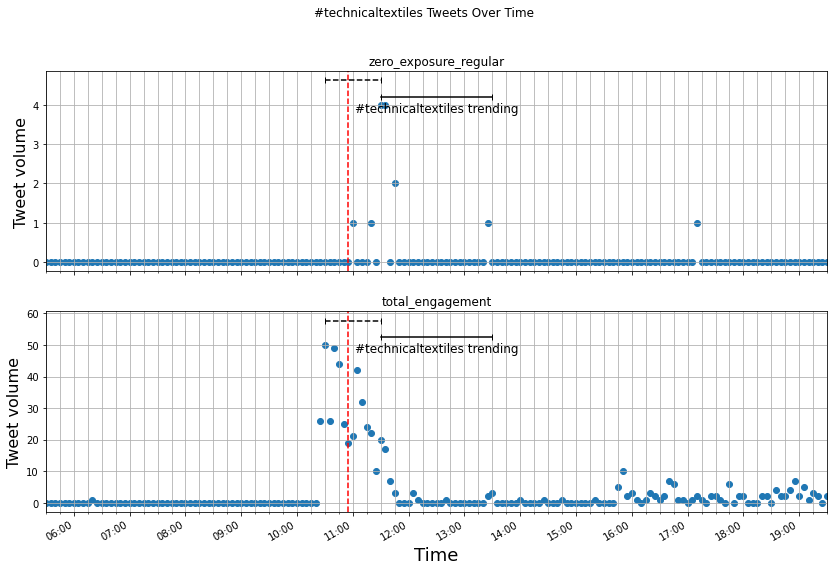

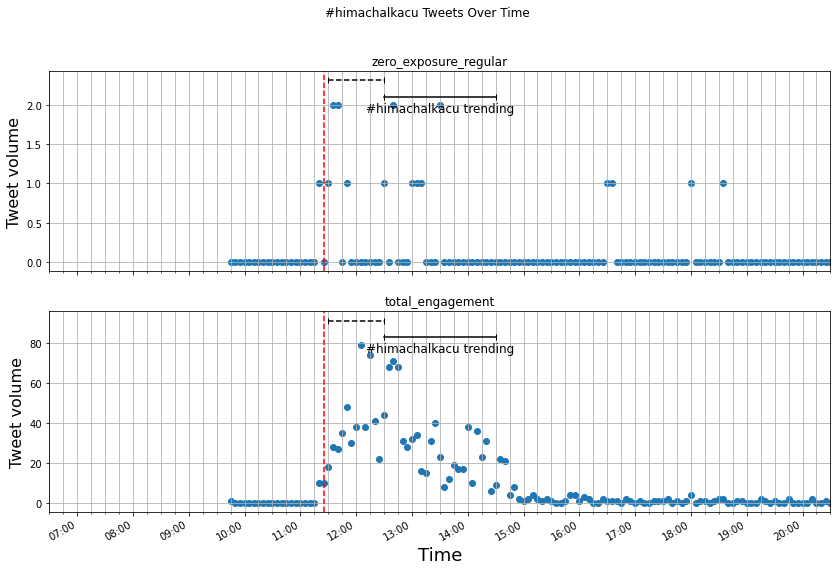

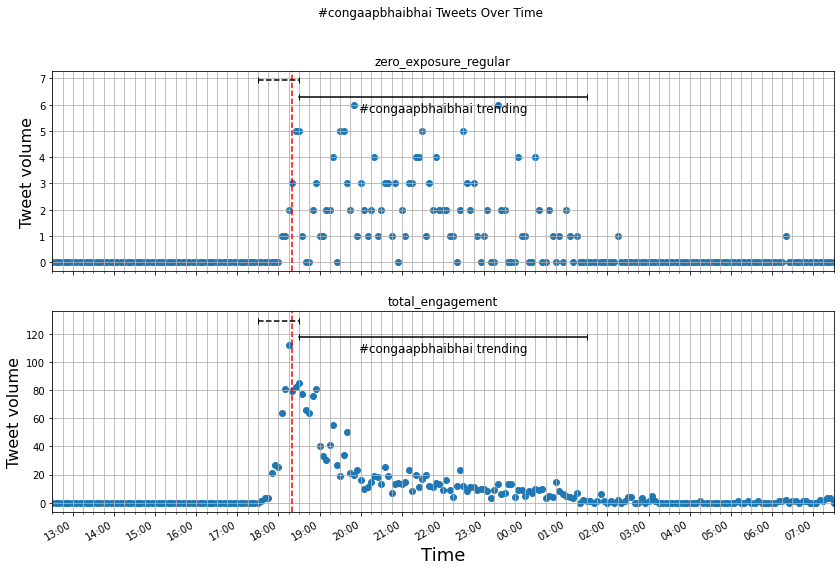

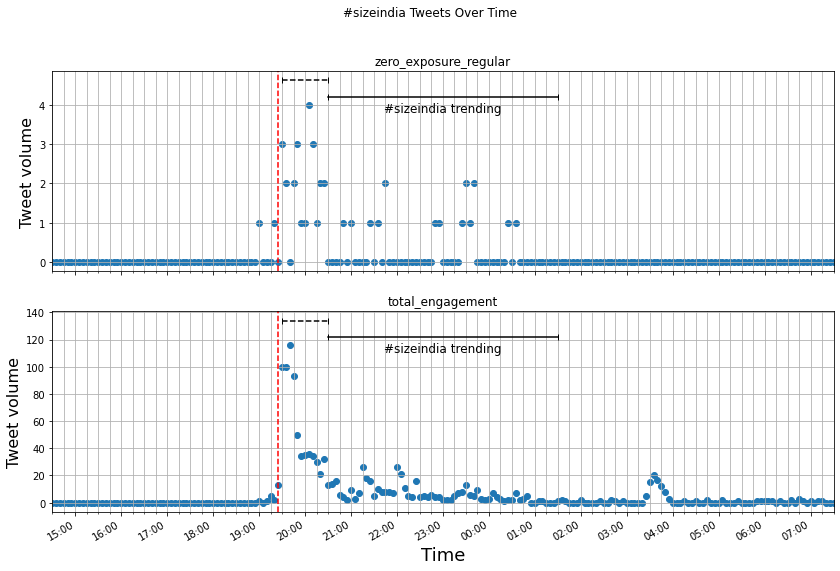

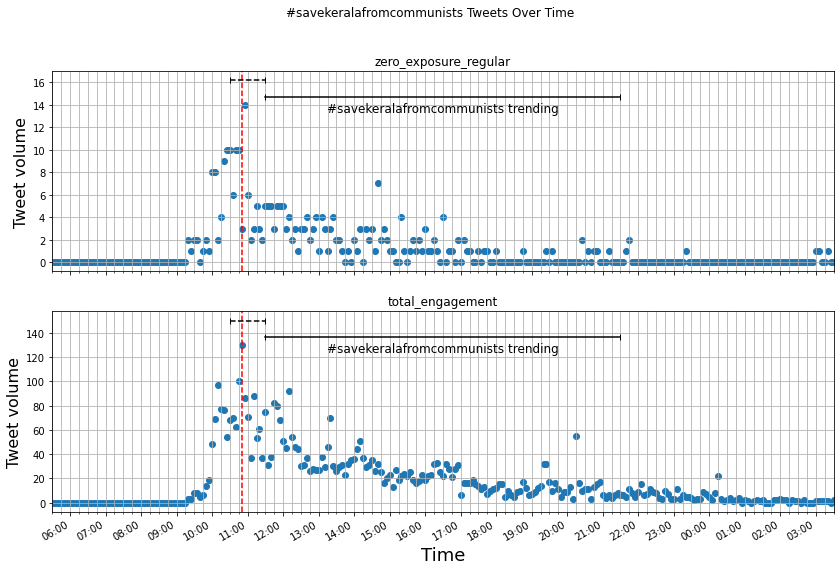

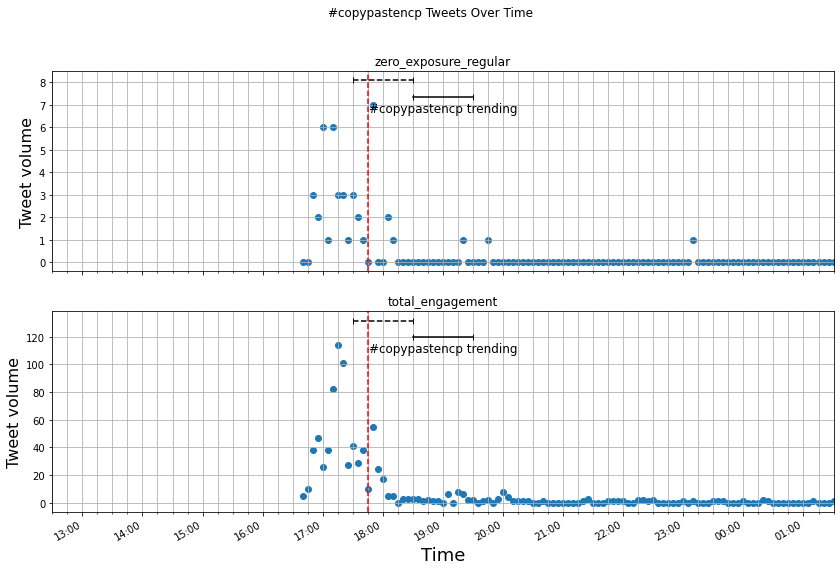

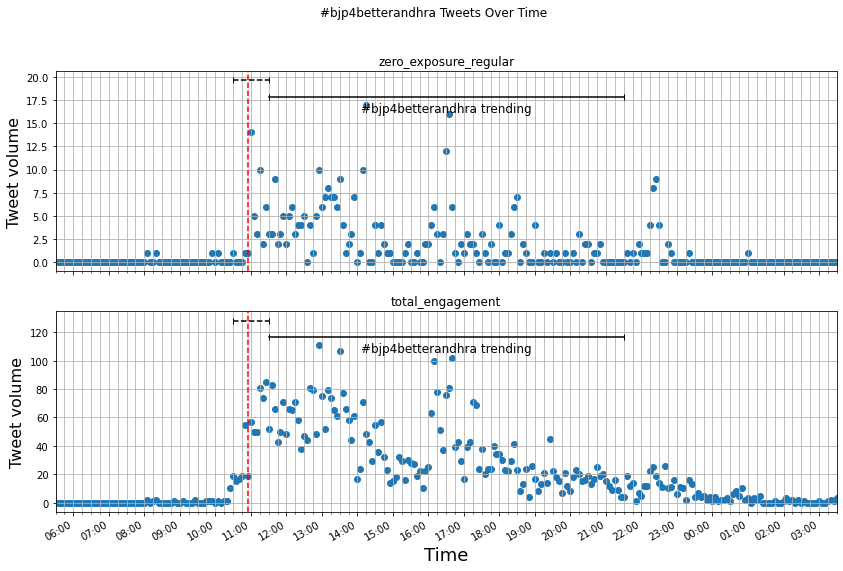

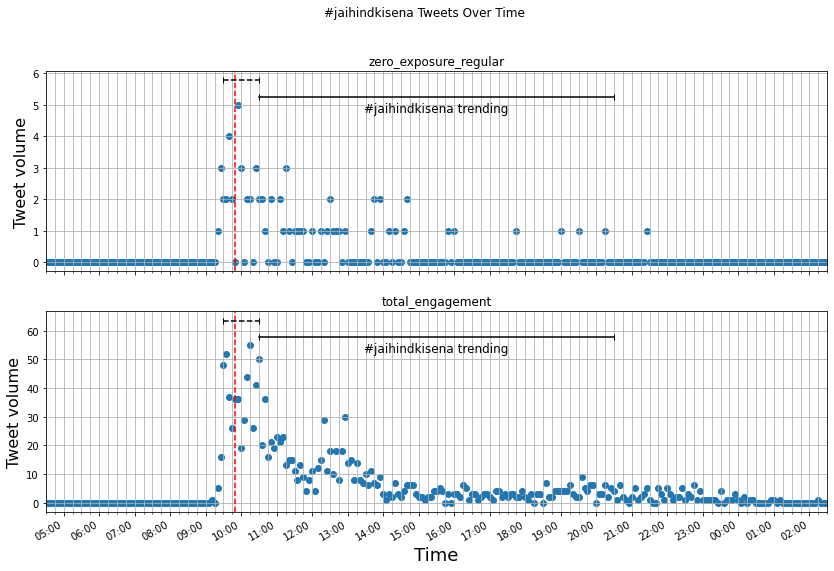

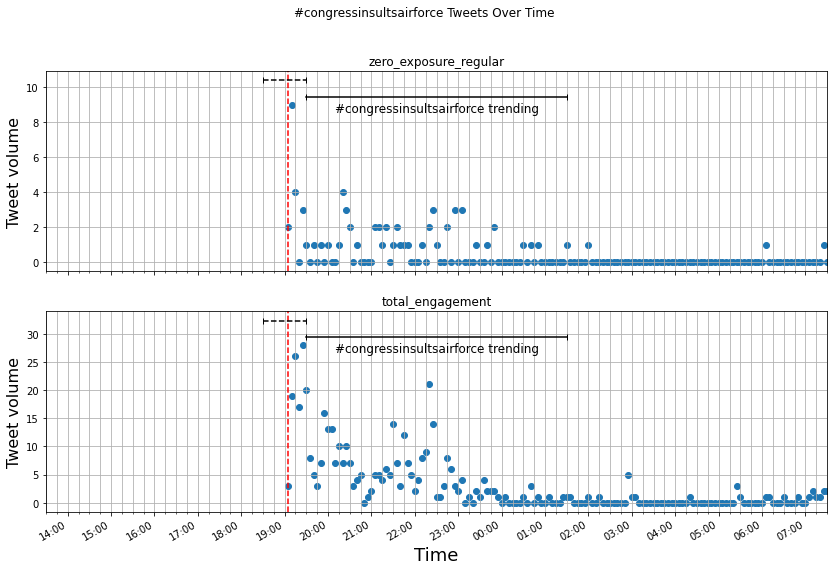

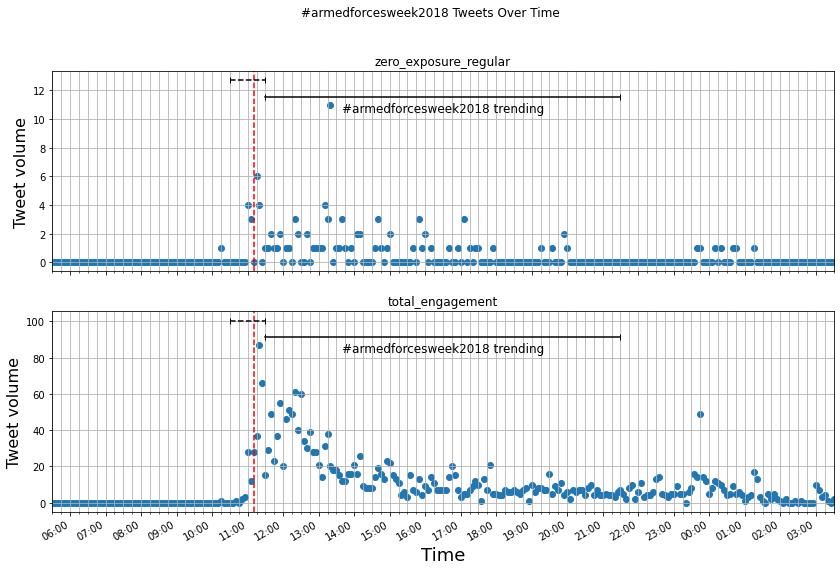

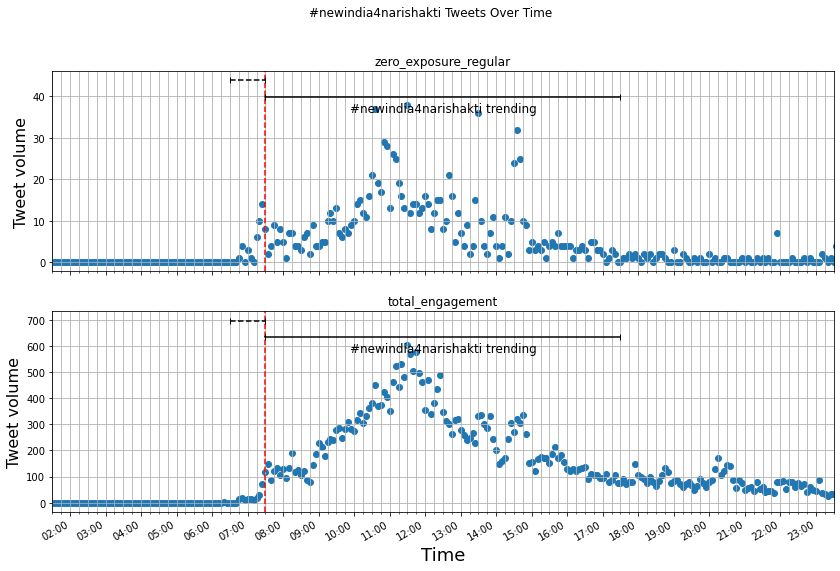

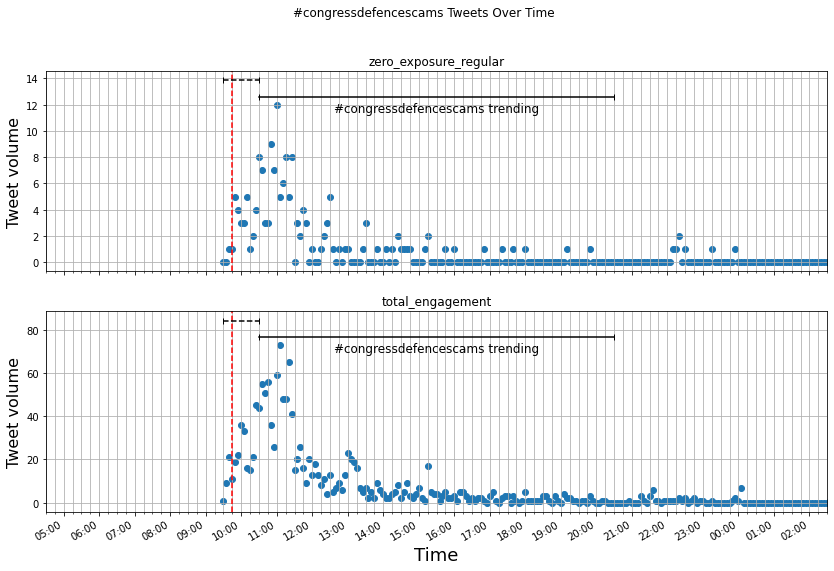

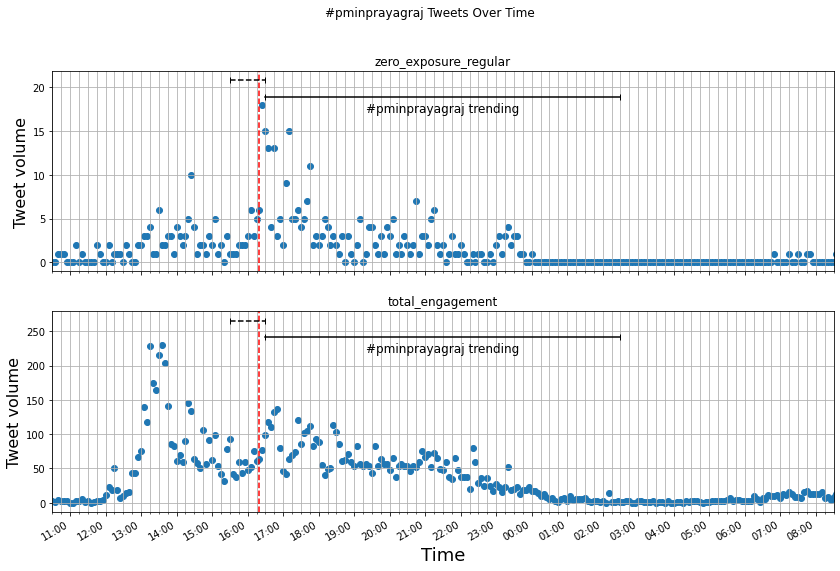

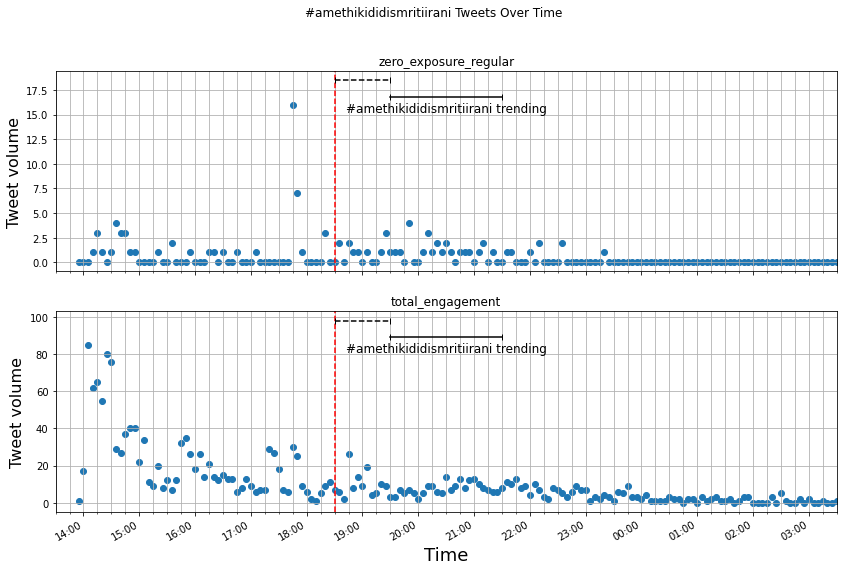

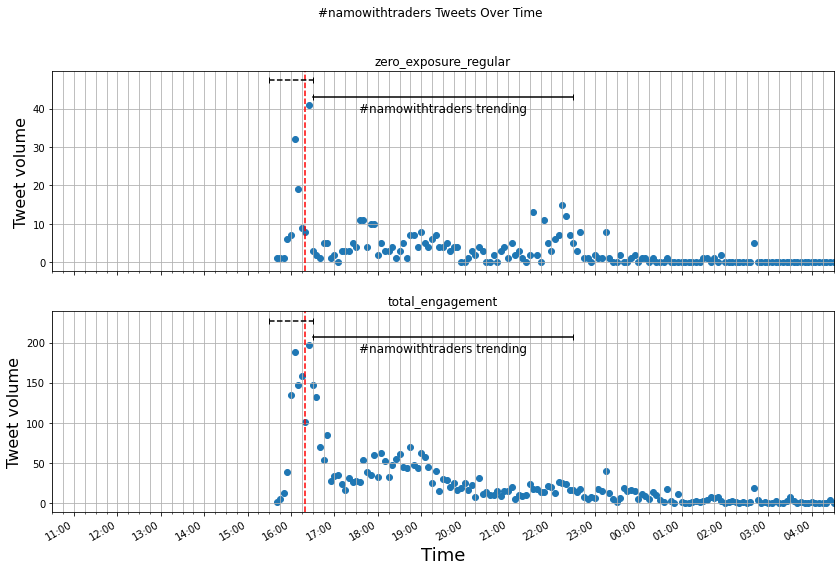

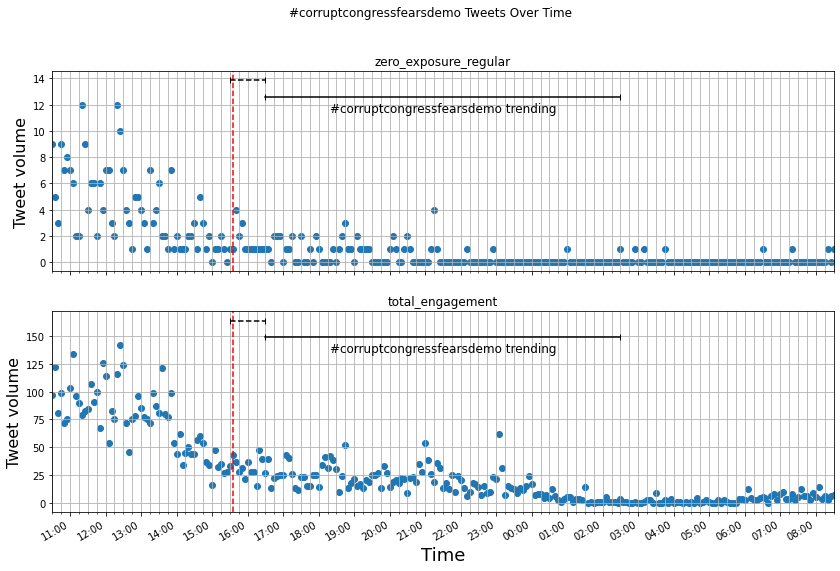

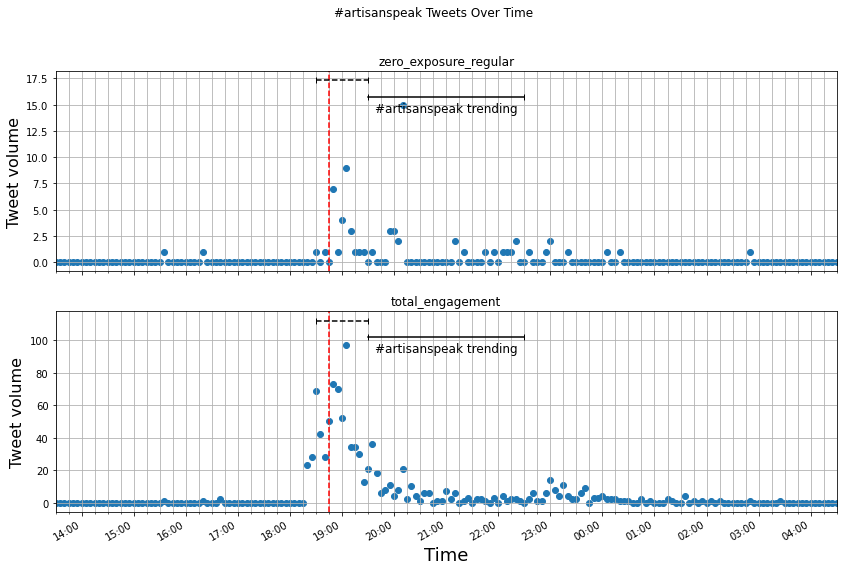

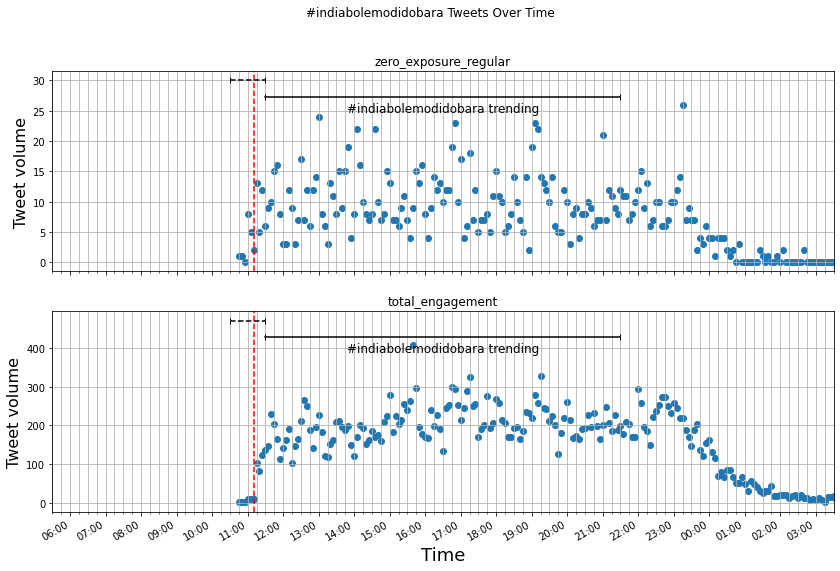

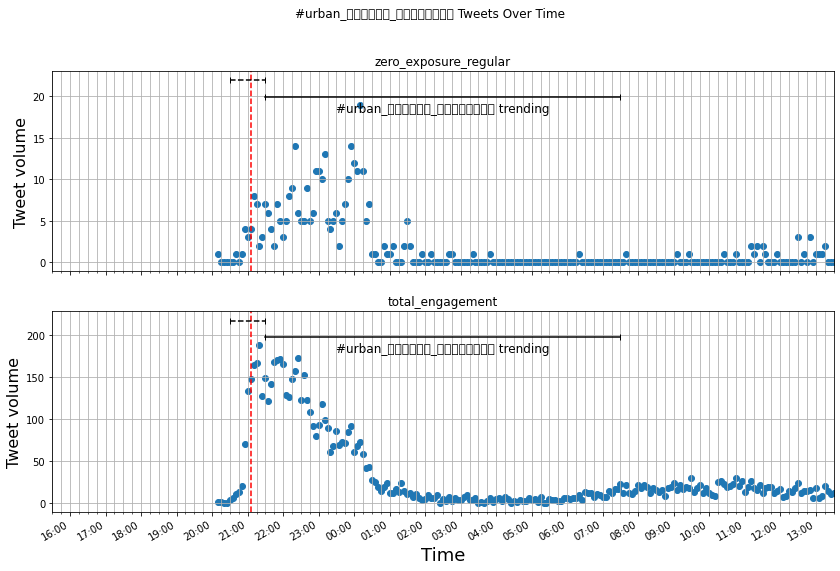

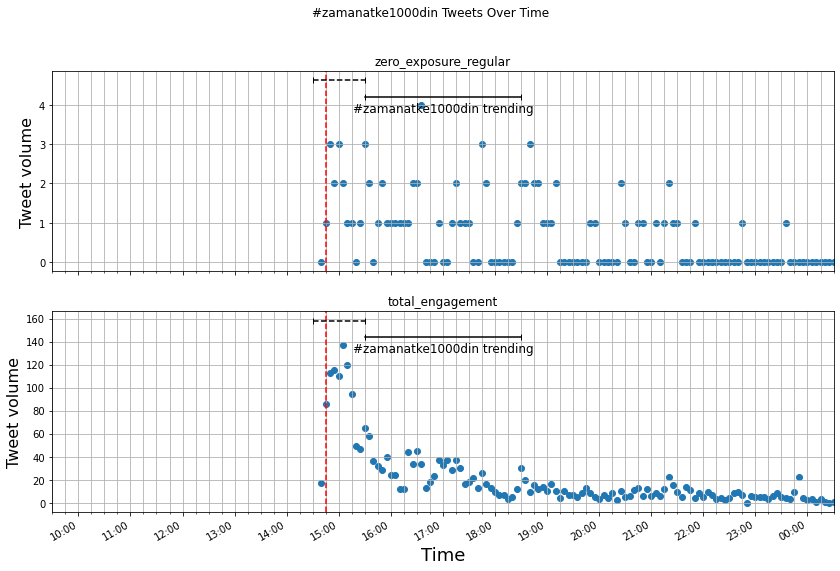

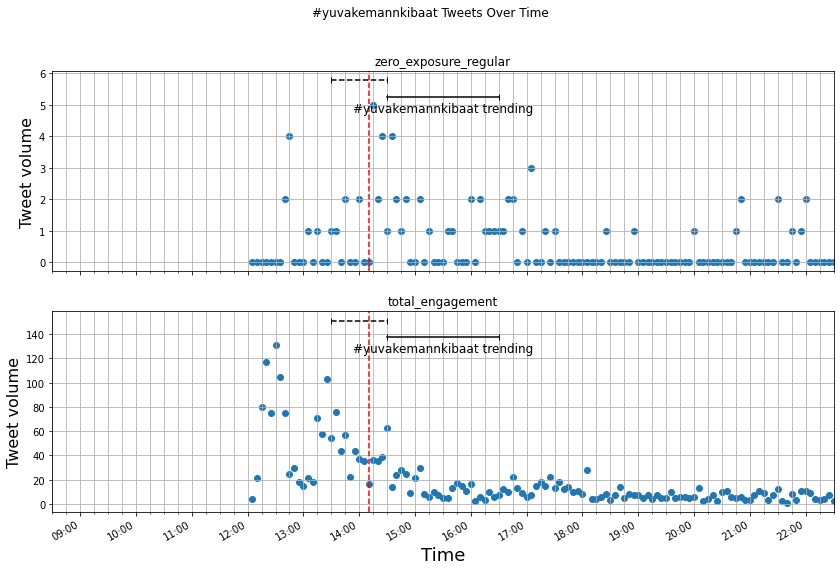

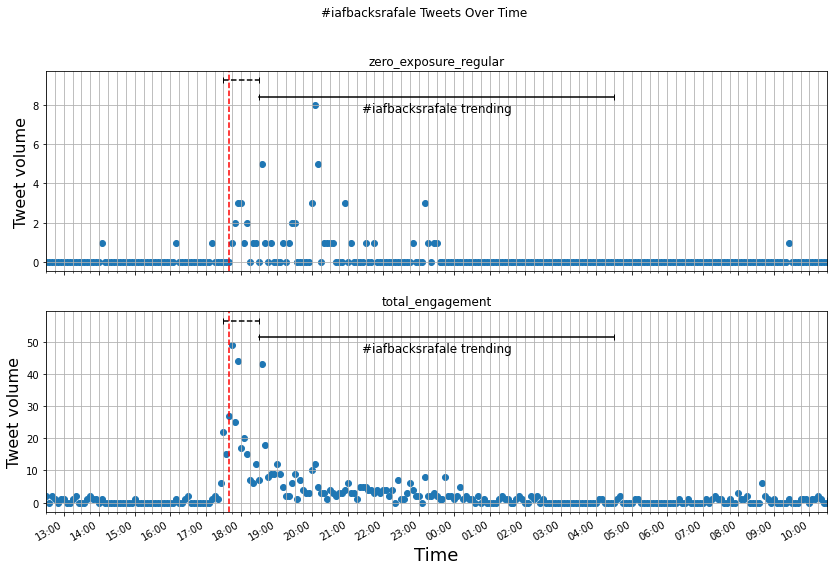

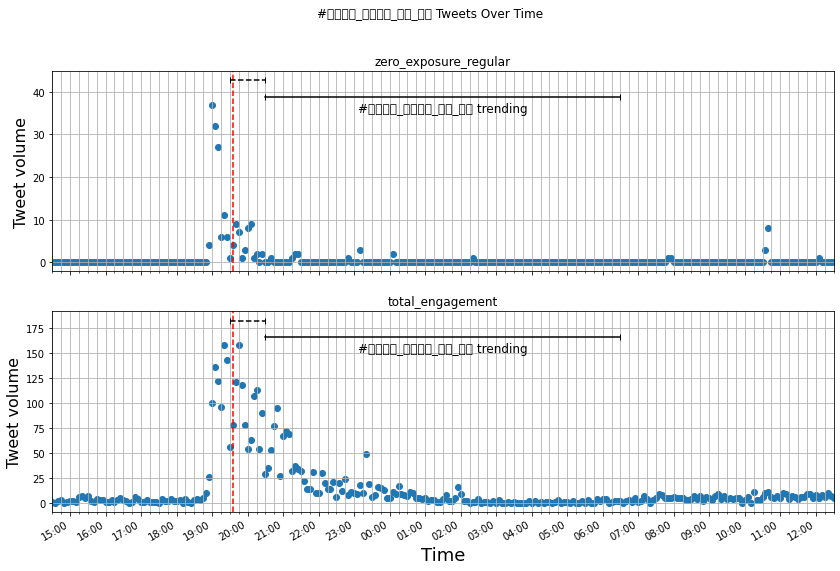

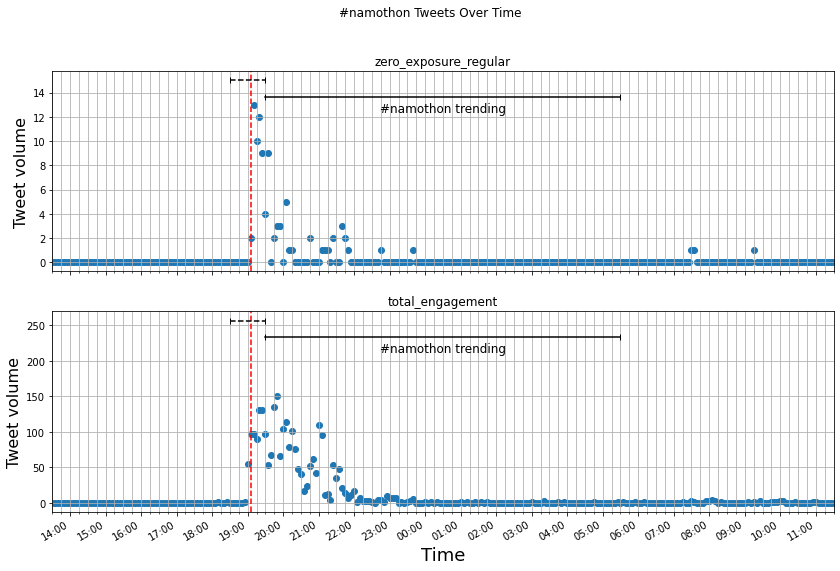

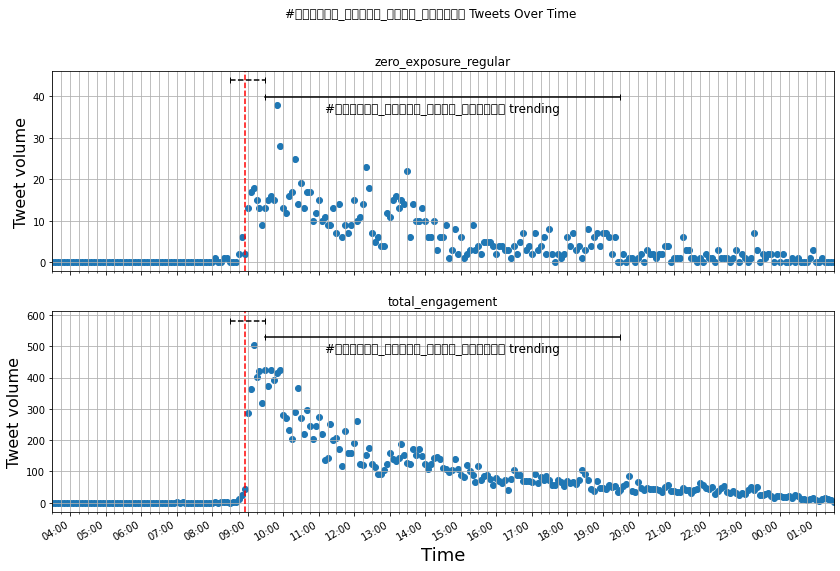

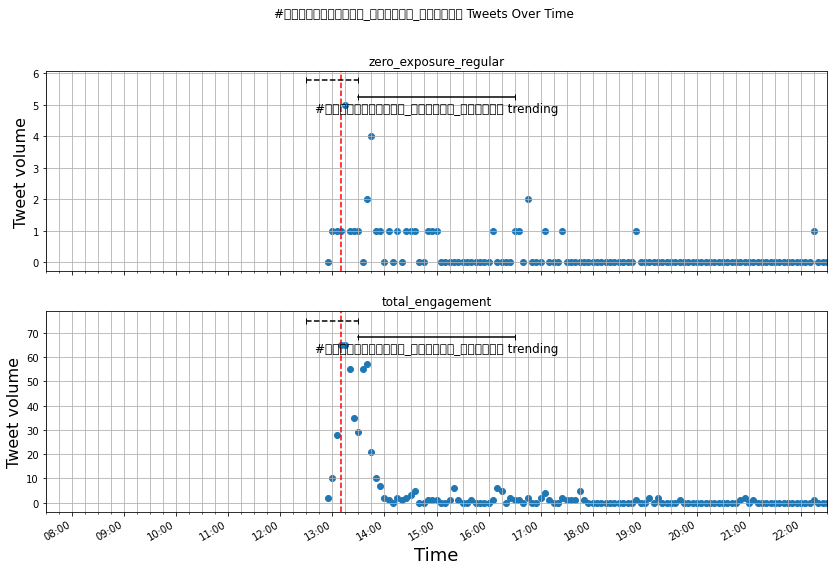

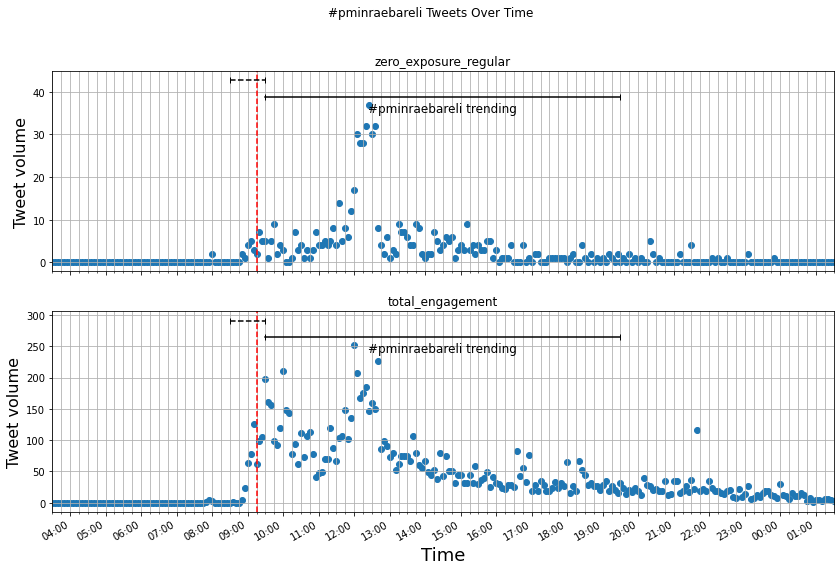

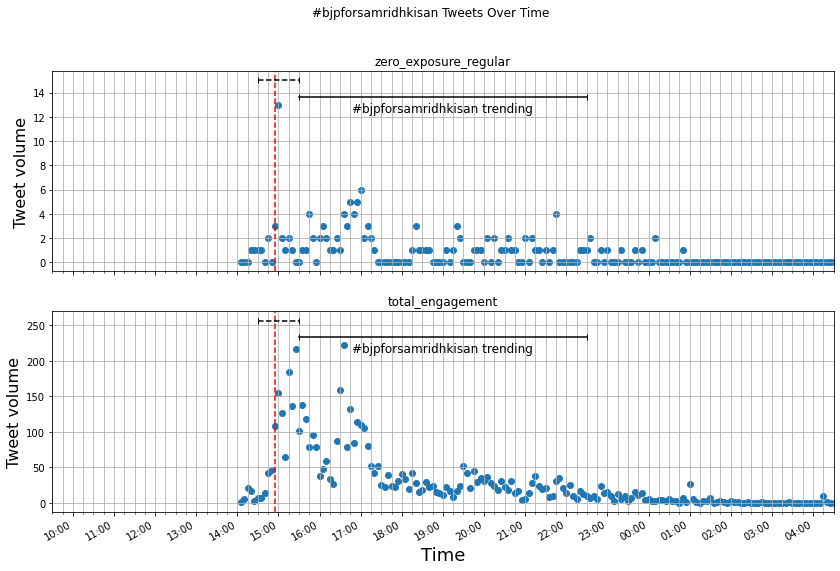

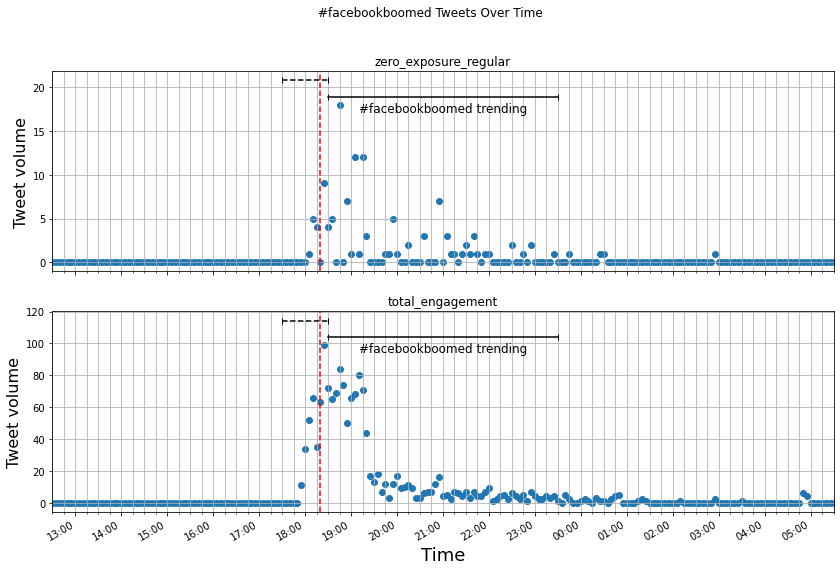

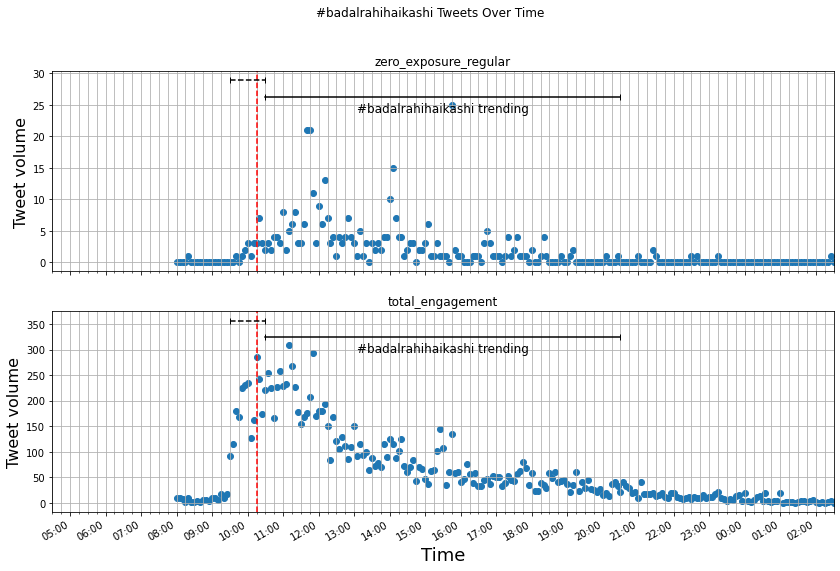

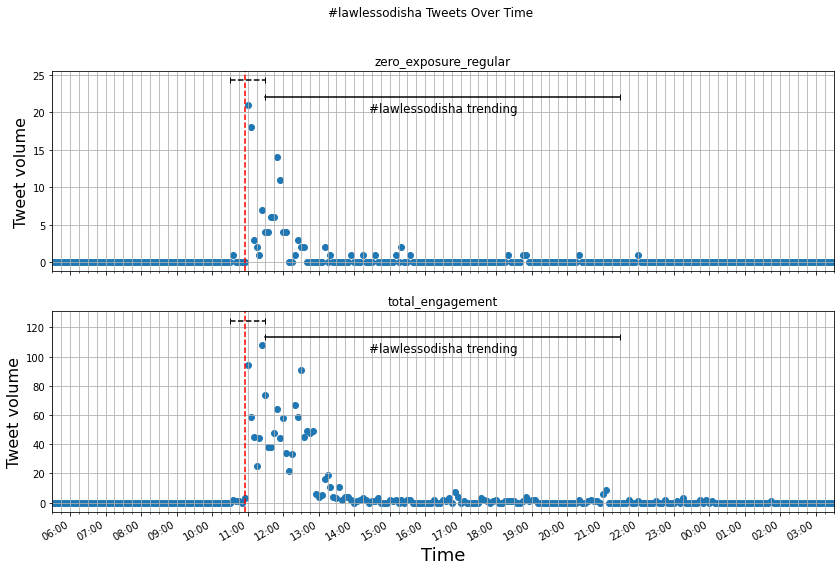

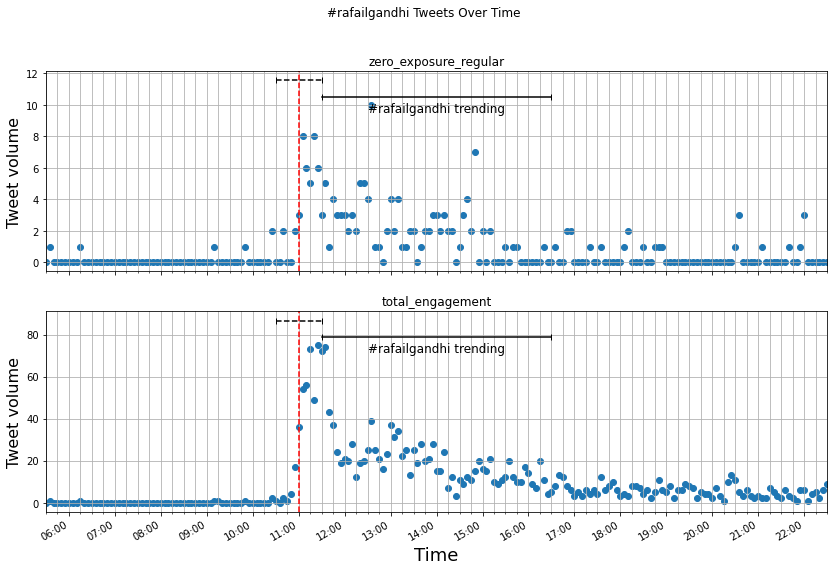

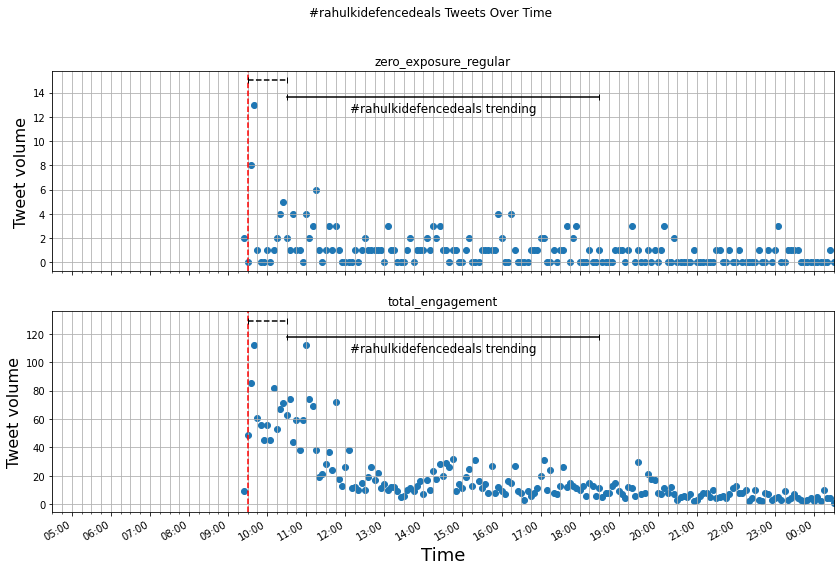

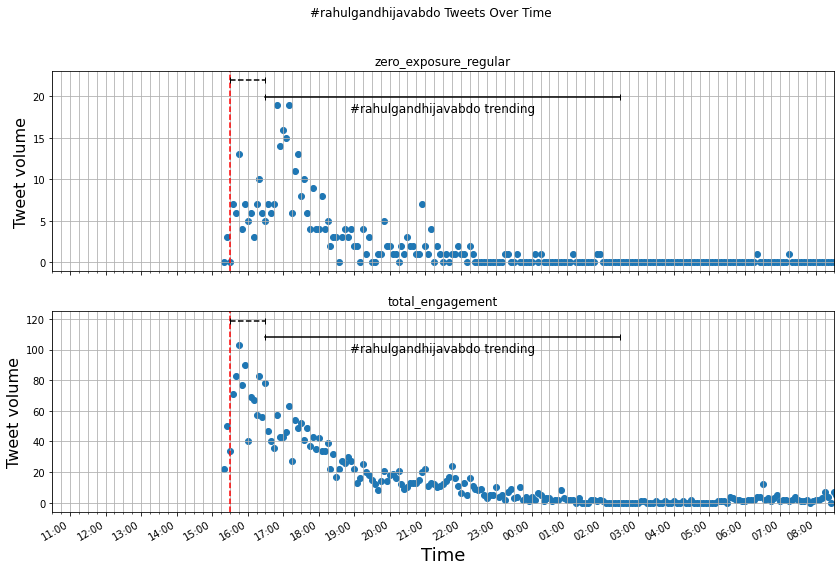

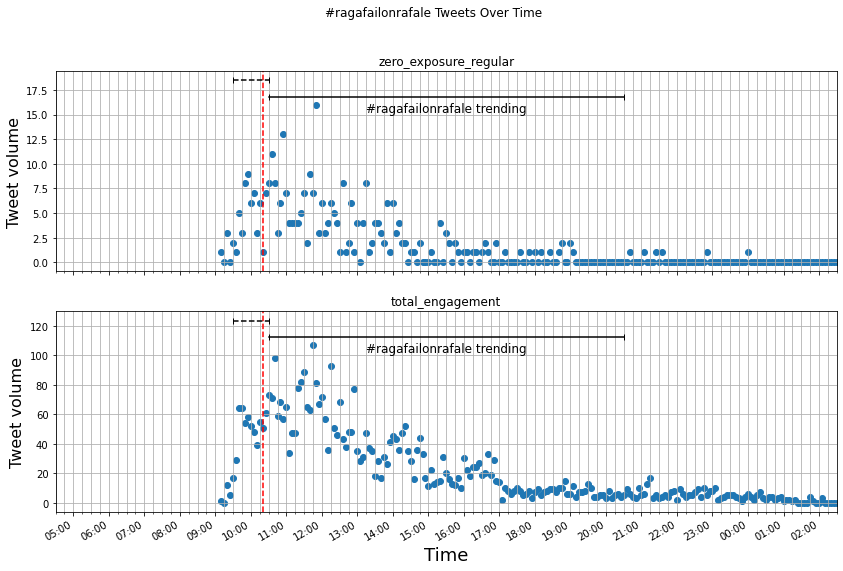

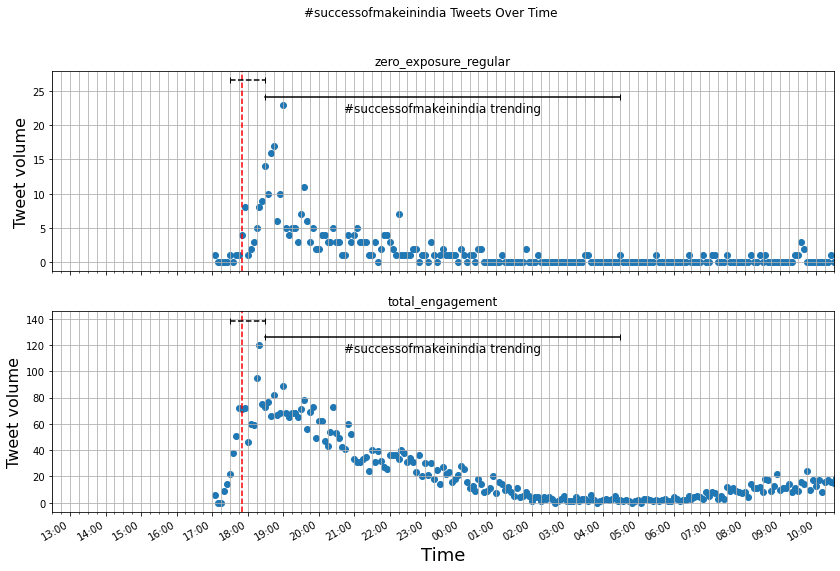

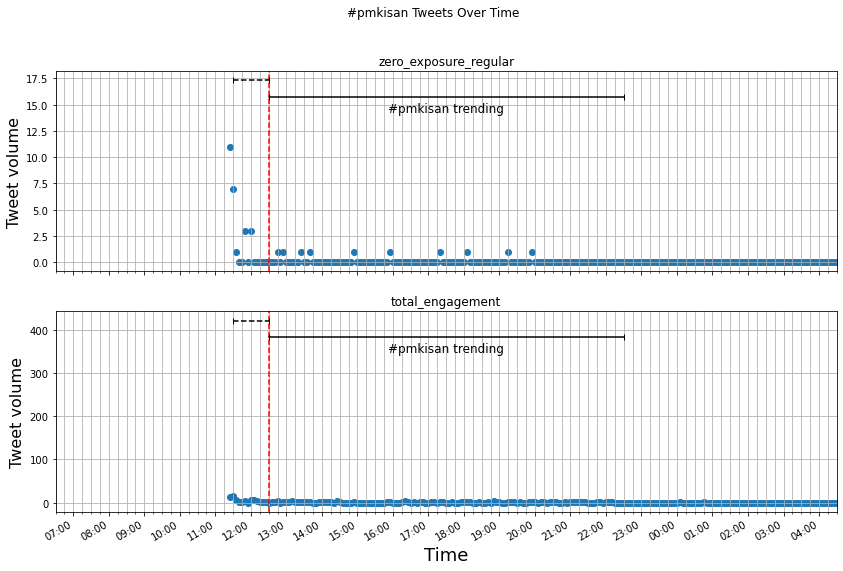

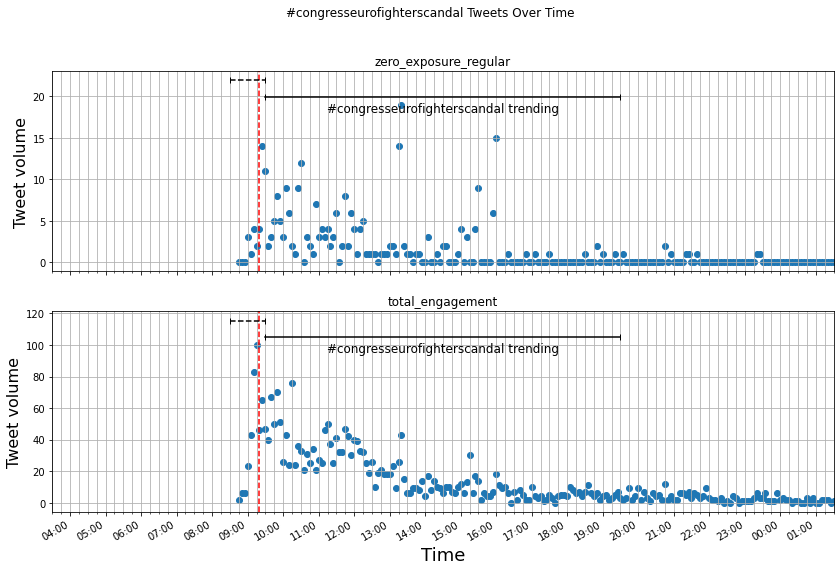

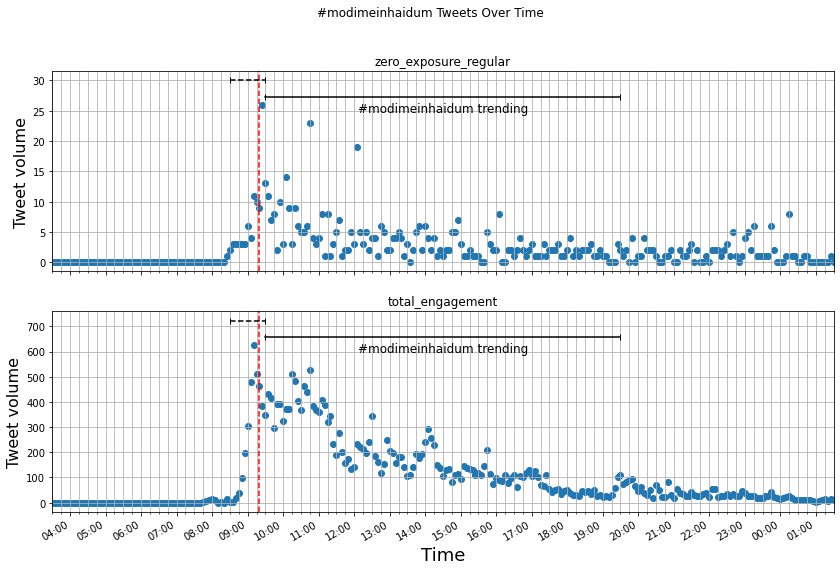

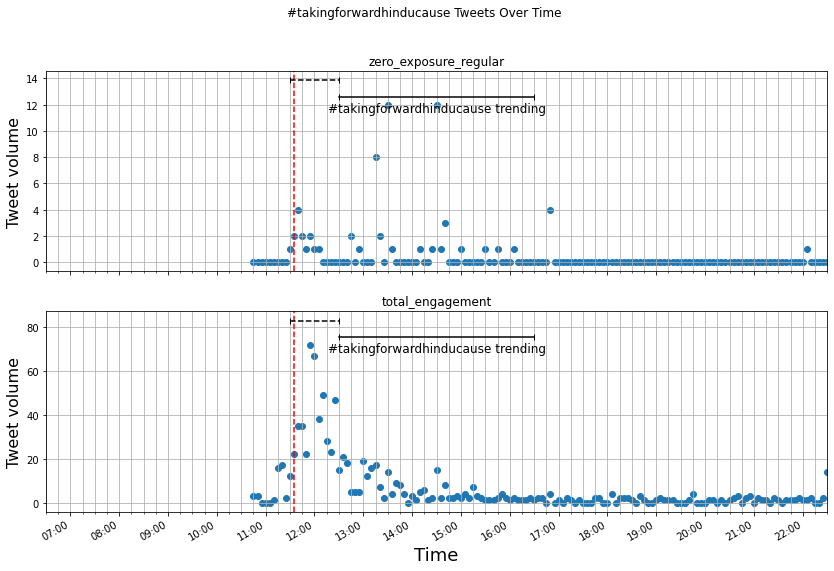

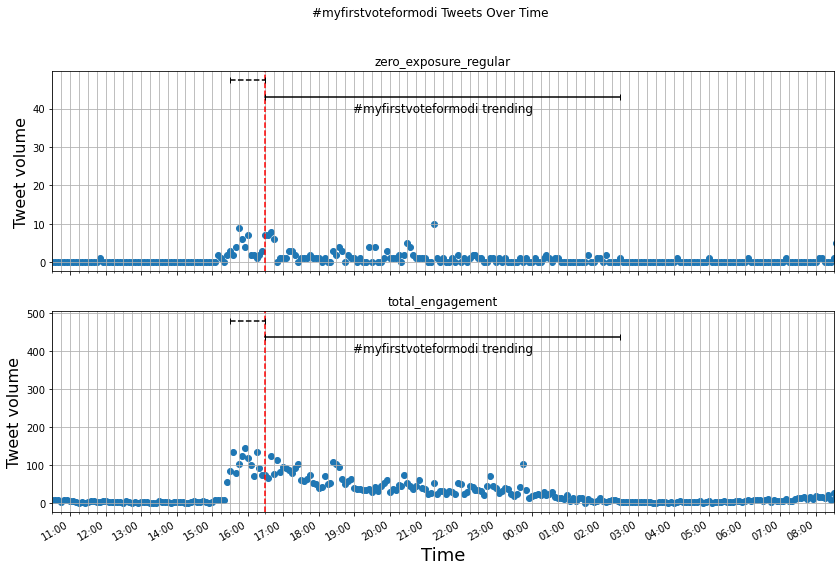

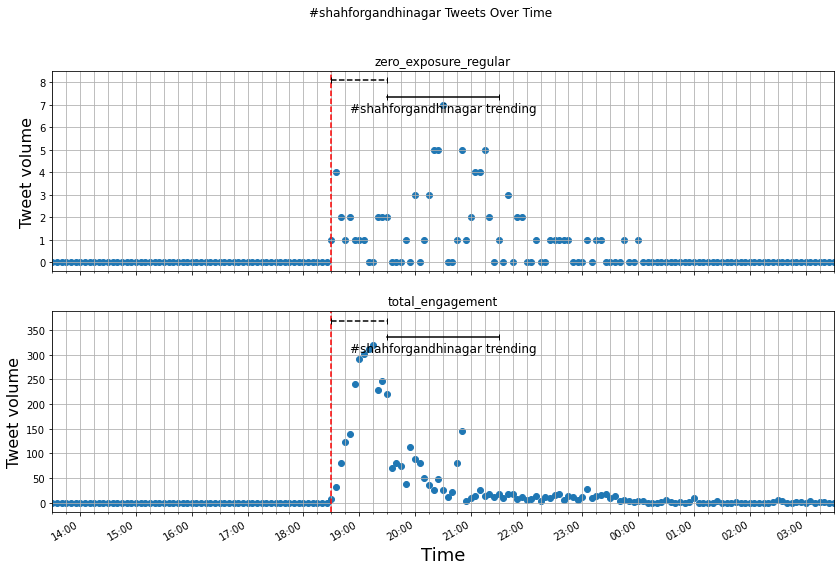

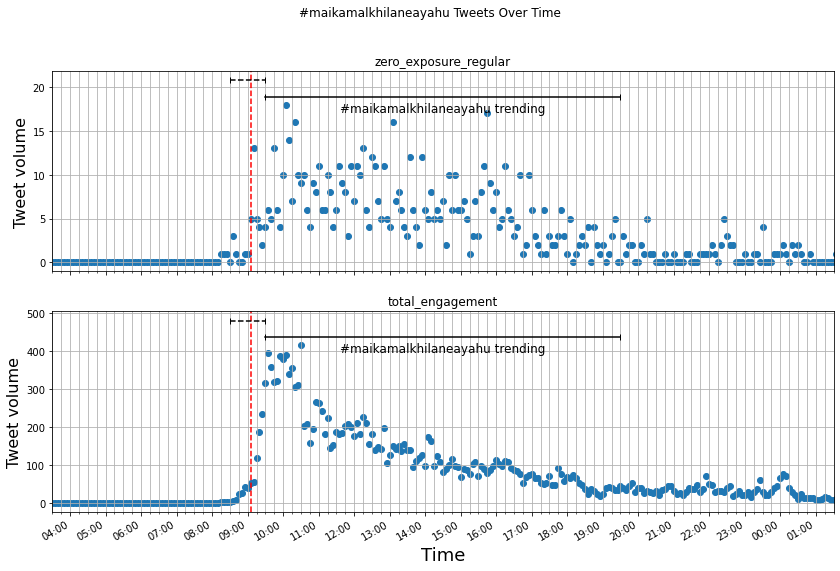

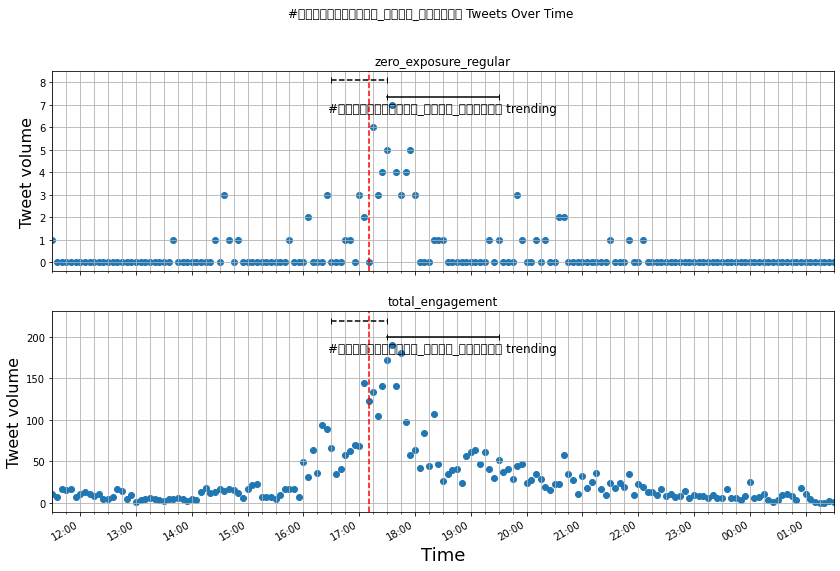

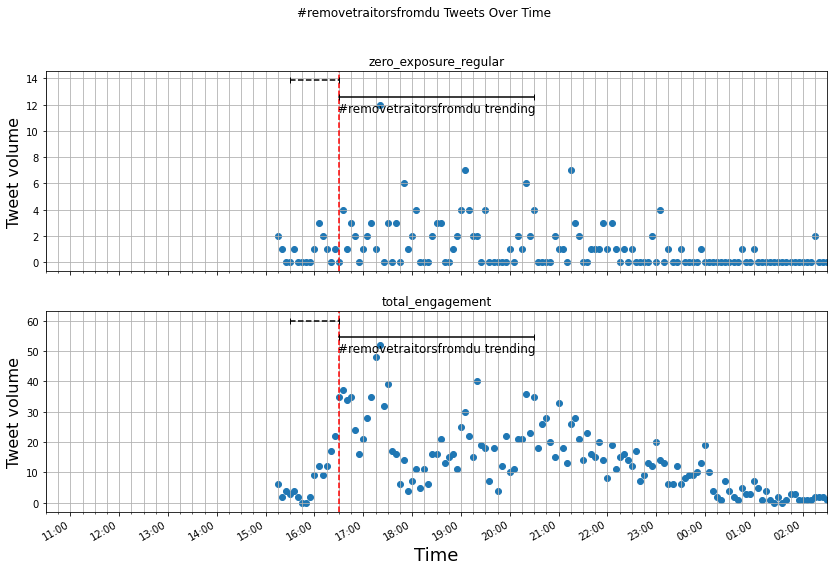

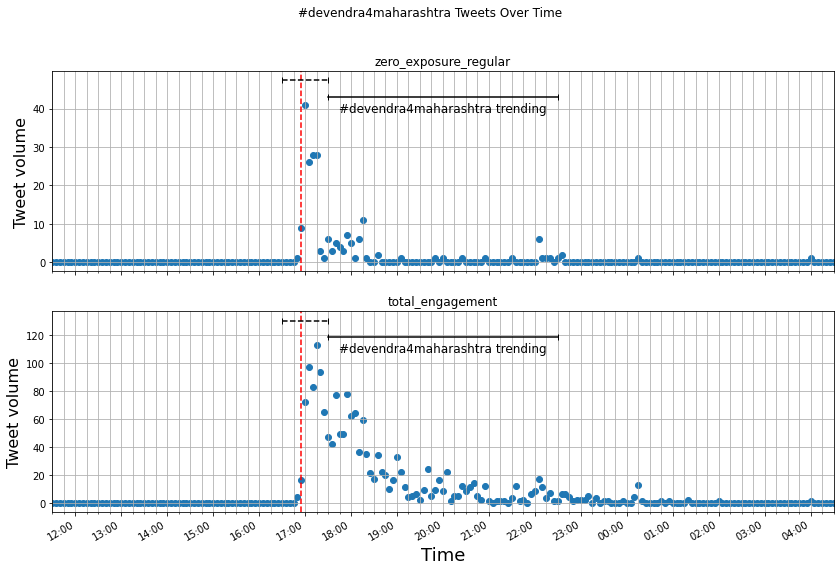

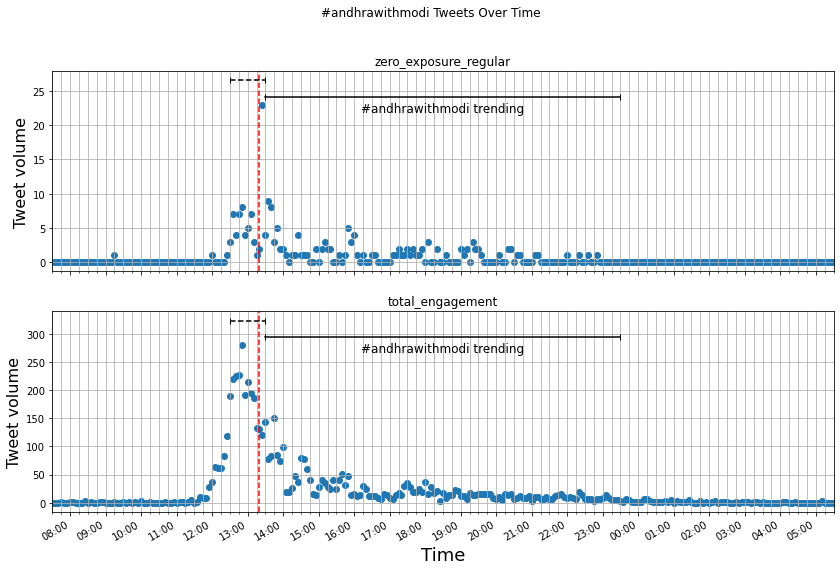

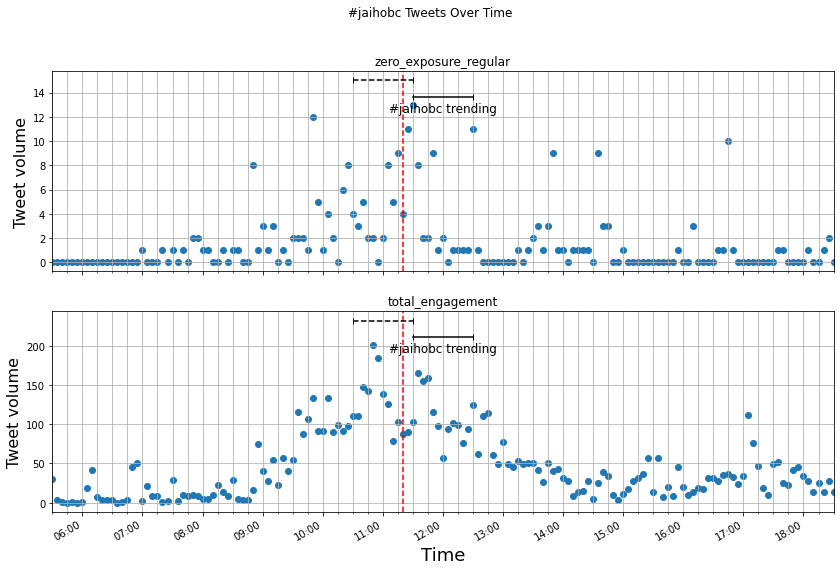

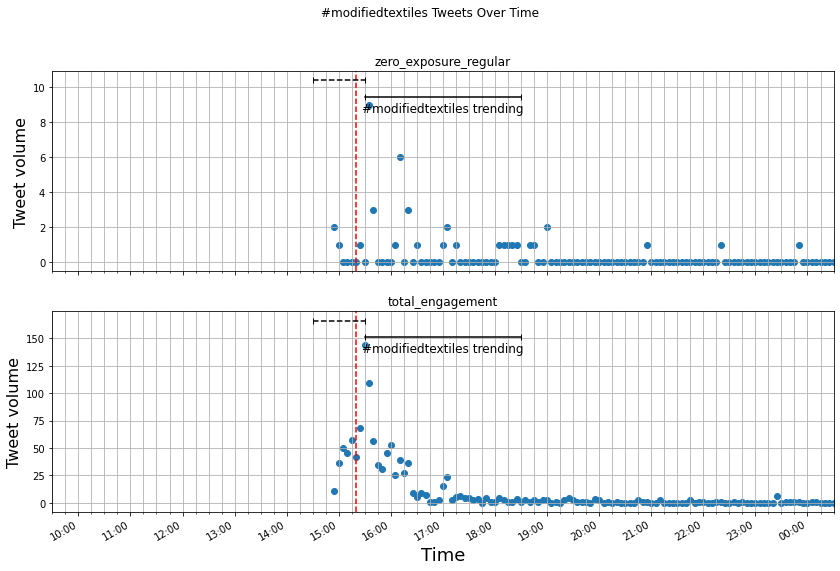

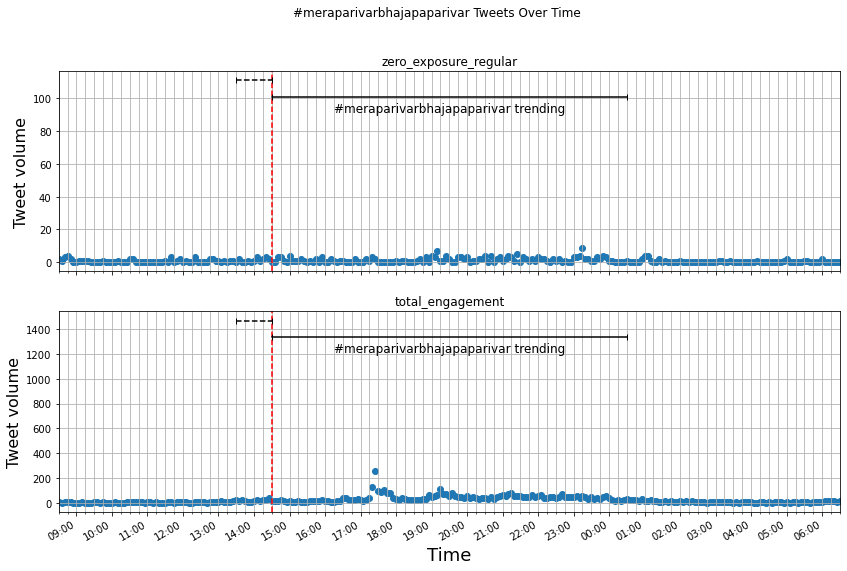

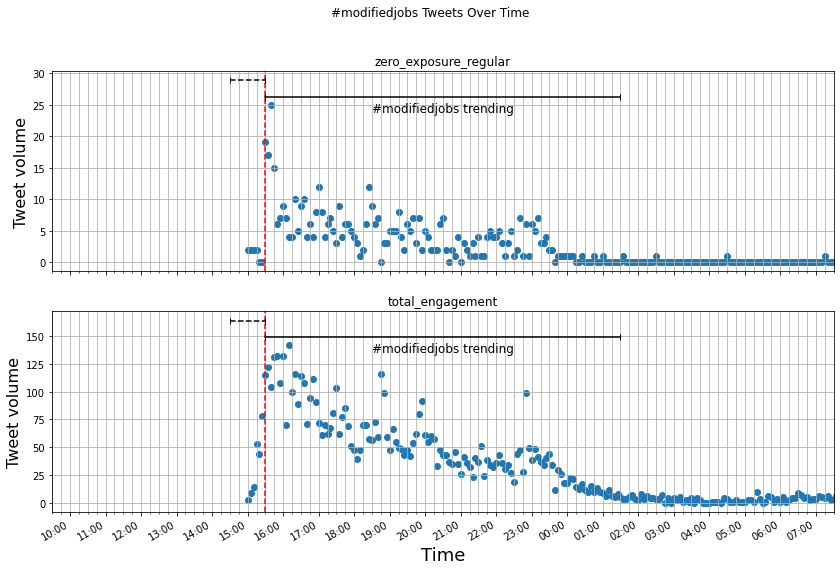

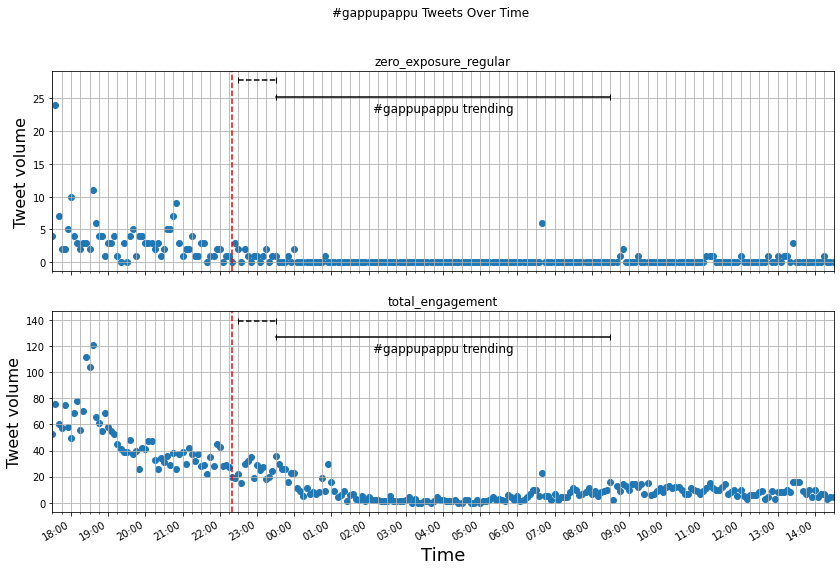

In [8]:
meta_res = []
for hashtag, tweet_dict in campaigns.items():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        res = trending.run_statistics(
            *build_df(hashtag, tweet_dict, exposures, time_bin='5Min', plot=True), 
                                      periods=(12,12))
        meta_res.append(pd.concat({hashtag: res}, names=['Hashtag']))


Text(0, 0.5, '')

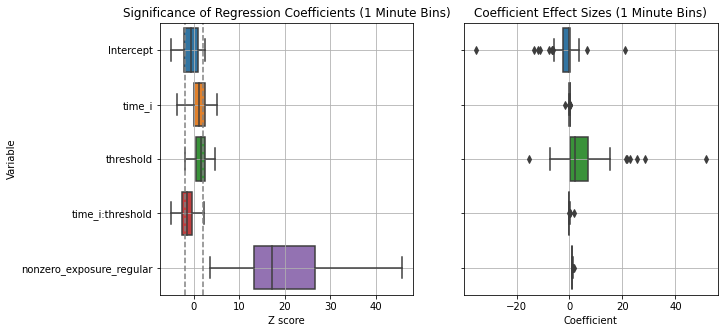

In [111]:
df = pd.concat(meta_res)
df['Trial'] = df.index.get_level_values(1)
df['Variable'] = df.index.get_level_values(2)
df['Hashtag'] = df.index.get_level_values(0)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10,5))

sns.boxplot(x='z', y='Variable', data=df, ax=ax[0], showfliers = False)
ax[0].grid(True)
ax[0].set_title('Significance of Regression Coefficients (1 Minute Bins)')
ax[0].set_xlabel('Z score')
# plt.ylabel('Model Parameter')
ax[0].axvline(2, color='grey', ls='--')
ax[0].axvline(-2, color='grey', ls='--')

sns.boxplot(x='coef', y='Variable', data=df, ax=ax[1])
ax[1].grid(True)
ax[1].set_title('Coefficient Effect Sizes (1 Minute Bins)')
ax[1].set_xlabel('Coefficient')
ax[1].set_ylabel('')

In [154]:
meta_res = []
for hashtag, tweet_dict in campaigns.items():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        res = trending.run_statistics(
            *build_df(hashtag, tweet_dict, exposures, time_bin='5Min'), 
                                      periods=(12,12))
        meta_res.append(pd.concat({hashtag: res}, names=['Hashtag']))


Not enough periods in df, running on model from  2019-04-22 08:35:00 to 2019-04-22 09:55:00
Not enough periods in df, running on model from  2019-01-06 17:25:00 to 2019-01-06 18:45:00
Not enough periods in df, running on model from  2019-02-13 11:25:00 to 2019-02-13 13:00:00
Not enough periods in df, running on model from  2018-12-20 19:05:00 to 2018-12-20 20:00:00
Not enough periods in df, running on model from  2018-10-17 09:30:00 to 2018-10-17 10:40:00
Not enough periods in df, running on model from  2019-04-19 15:40:00 to 2019-04-19 17:15:00
Not enough periods in df, running on model from  2019-04-17 10:45:00 to 2019-04-17 12:05:00
Not enough periods in df, running on model from  2019-03-13 20:10:00 to 2019-03-13 22:00:00
Not enough periods in df, running on model from  2018-09-14 14:40:00 to 2018-09-14 15:40:00
Not enough periods in df, running on model from  2018-09-06 12:55:00 to 2018-09-06 14:05:00
Not enough periods in df, running on model from  2019-02-23 14:05:00 to 2019-02-

Text(0, 0.5, '')

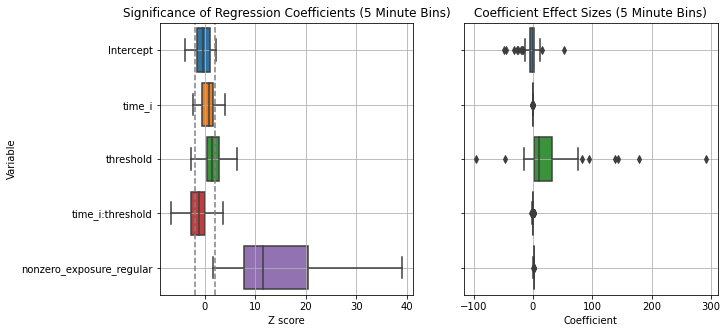

In [155]:
df = pd.concat(meta_res)
df['Trial'] = df.index.get_level_values(1)
df['Variable'] = df.index.get_level_values(2)
df['Hashtag'] = df.index.get_level_values(0)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10,5))

sns.boxplot(x='z', y='Variable', data=df, ax=ax[0], showfliers=False)
ax[0].grid(True)
ax[0].set_title('Significance of Regression Coefficients (5 Minute Bins)')
ax[0].set_xlabel('Z score')
# plt.ylabel('Model Parameter')
ax[0].axvline(2, color='grey', ls='--')
ax[0].axvline(-2, color='grey', ls='--')

sns.boxplot(x='coef', y='Variable', data=df, ax=ax[1])
ax[1].grid(True)
ax[1].set_title('Coefficient Effect Sizes (5 Minute Bins)')
ax[1].set_xlabel('Coefficient')
ax[1].set_ylabel('')

Not enough periods in df, running on model from  2019-04-22 08:38:00 to 2019-04-22 10:28:00
Not enough periods in df, running on model from  2019-01-06 17:26:00 to 2019-01-06 18:50:00
Not enough periods in df, running on model from  2019-02-13 11:28:00 to 2019-02-13 13:08:00
Not enough periods in df, running on model from  2018-12-05 10:18:00 to 2018-12-05 12:10:00
Not enough periods in df, running on model from  2018-12-20 19:06:00 to 2018-12-20 20:24:00
Not enough periods in df, running on model from  2018-10-17 09:32:00 to 2018-10-17 11:06:00
Not enough periods in df, running on model from  2019-04-19 15:42:00 to 2019-04-19 17:22:00
Not enough periods in df, running on model from  2019-04-17 10:48:00 to 2019-04-17 12:28:00
Not enough periods in df, running on model from  2019-03-13 20:12:00 to 2019-03-13 22:08:00
Not enough periods in df, running on model from  2018-09-14 14:40:00 to 2018-09-14 15:46:00
Not enough periods in df, running on model from  2018-09-06 12:58:00 to 2018-09-

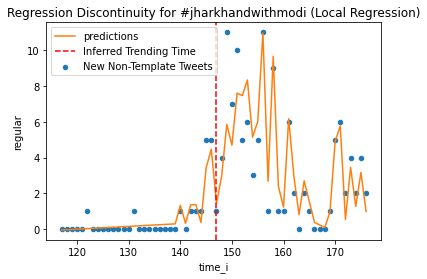

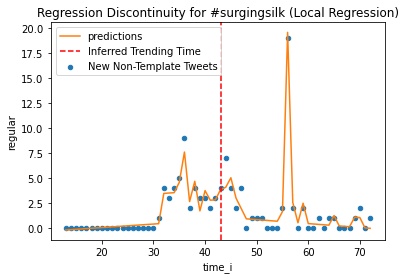

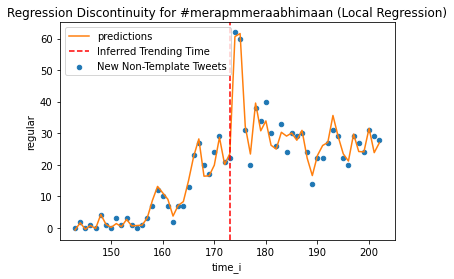

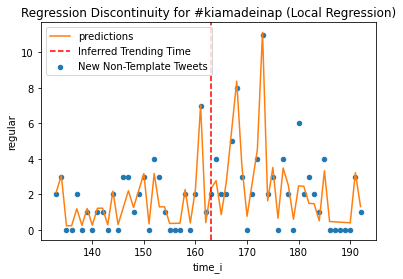

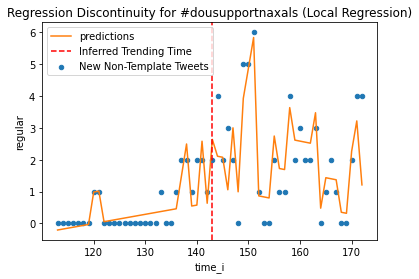

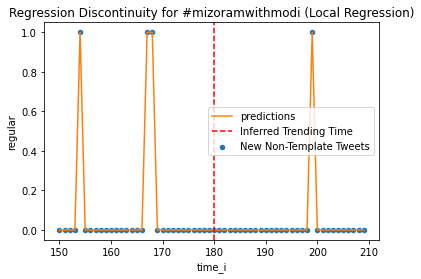

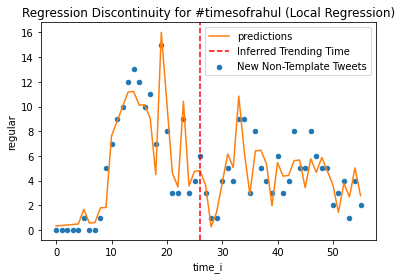

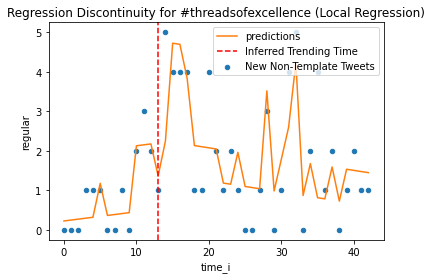

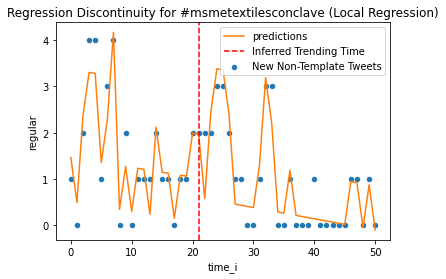

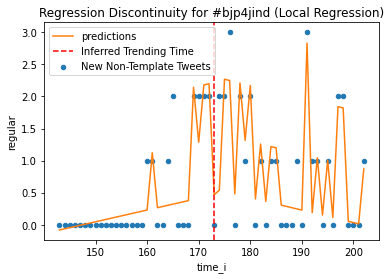

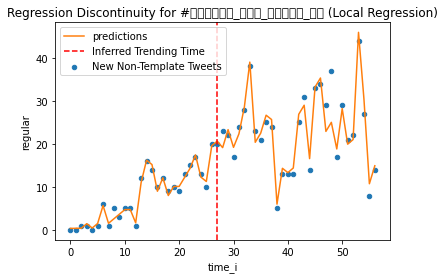

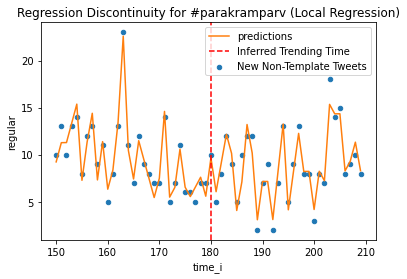

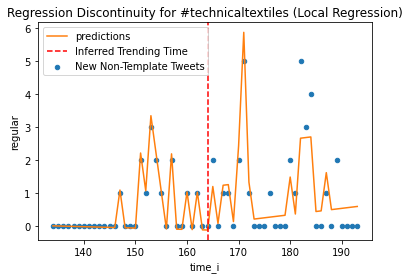

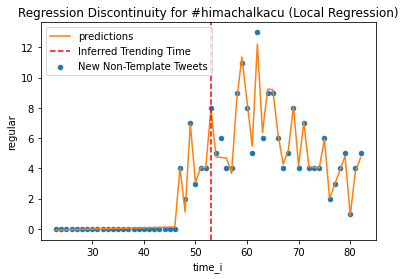

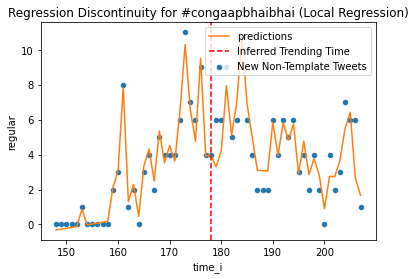

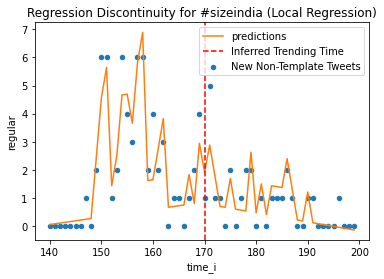

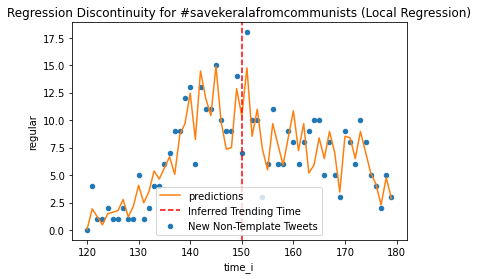

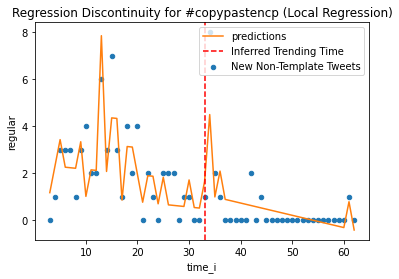

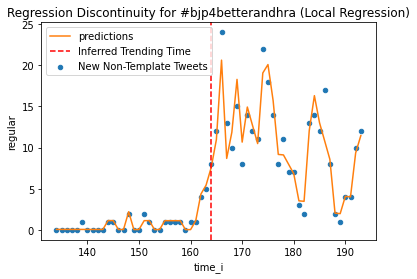

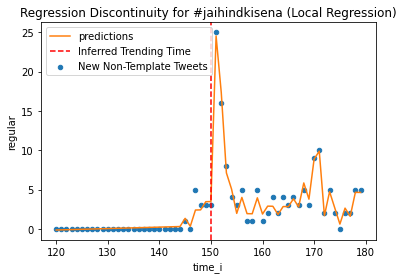

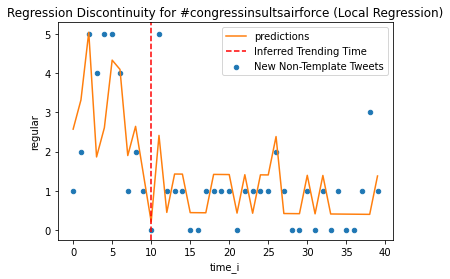

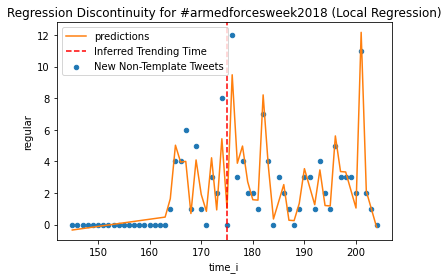

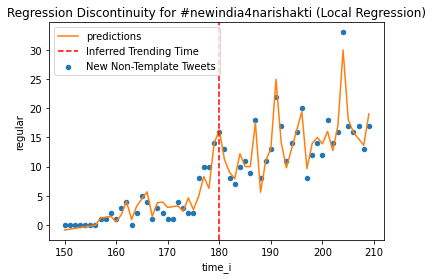

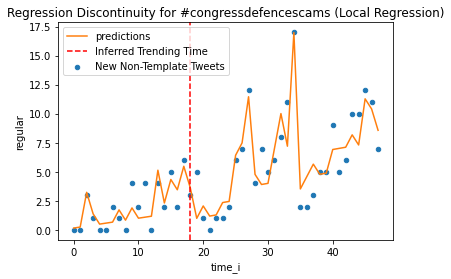

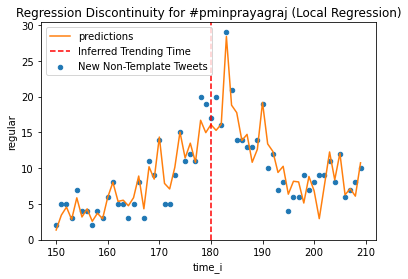

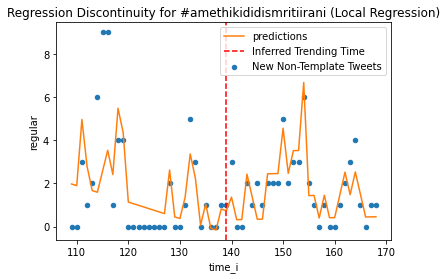

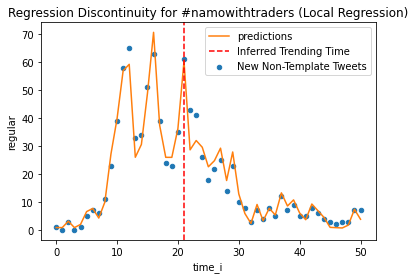

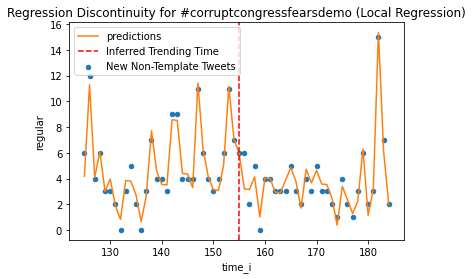

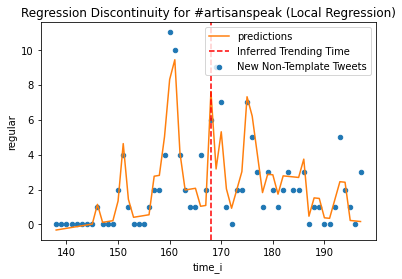

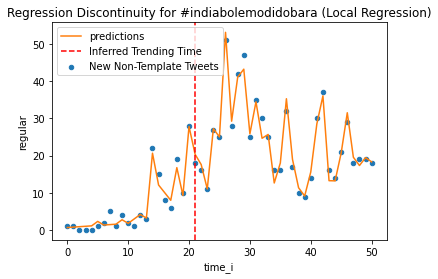

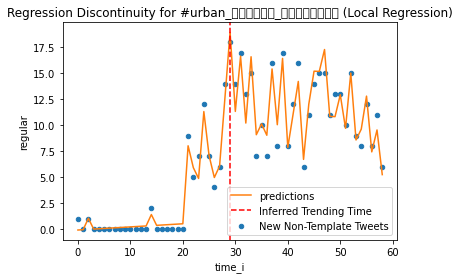

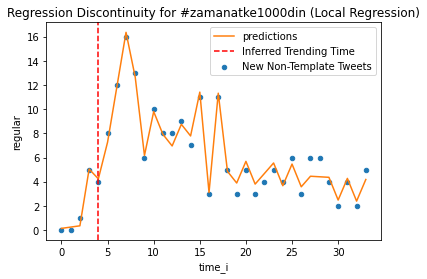

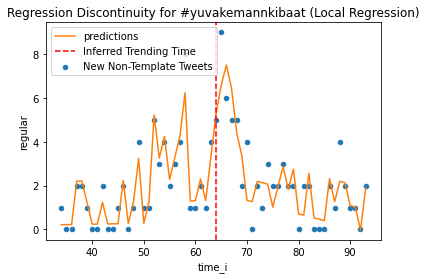

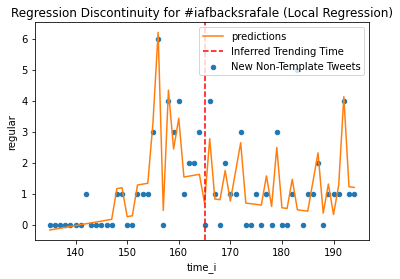

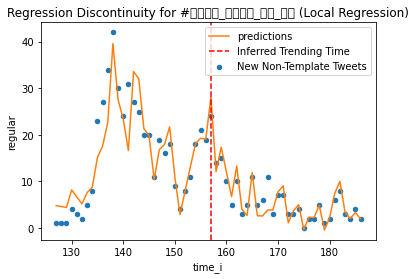

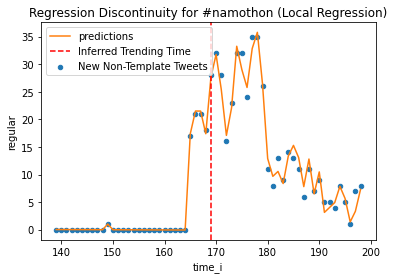

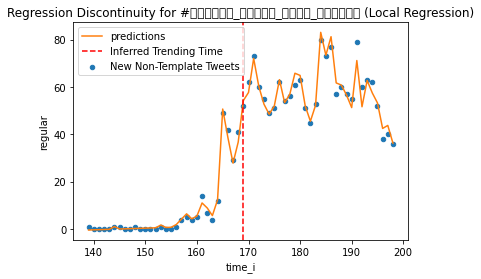

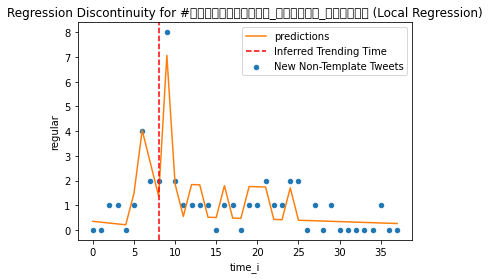

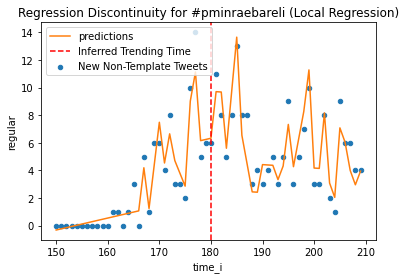

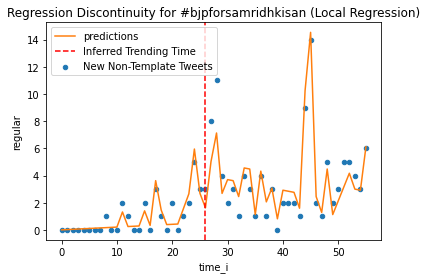

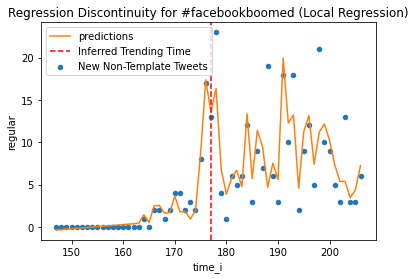

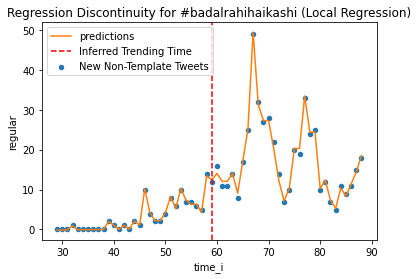

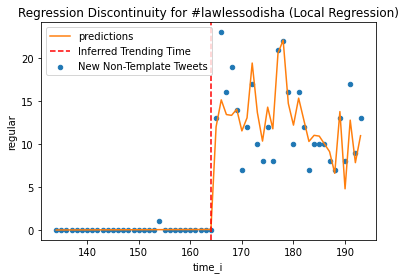

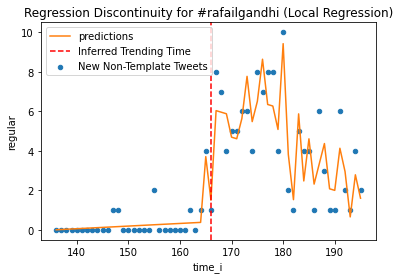

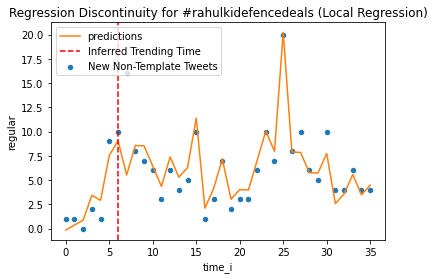

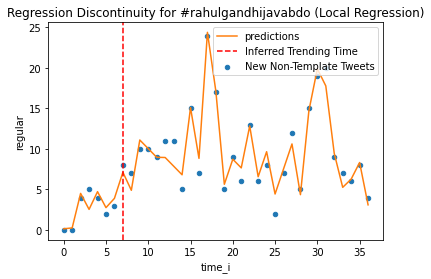

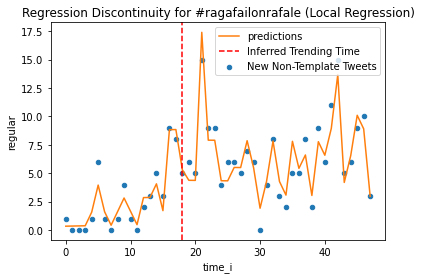

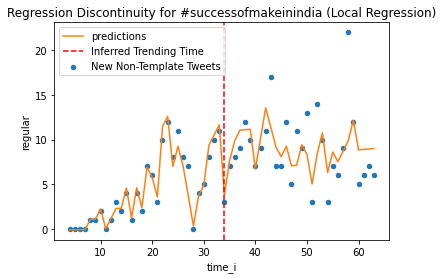

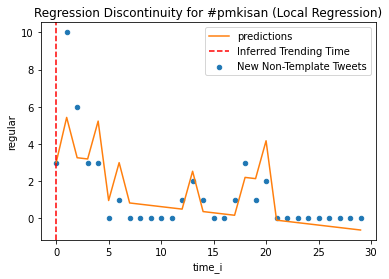

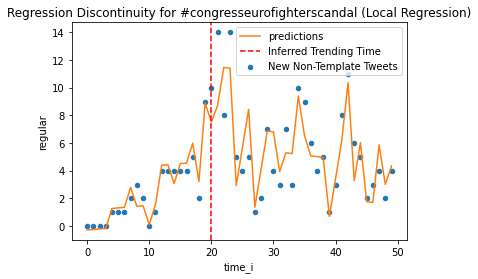

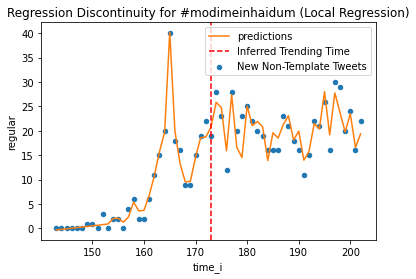

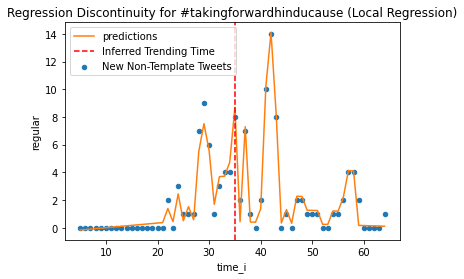

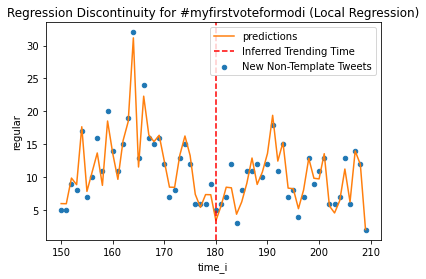

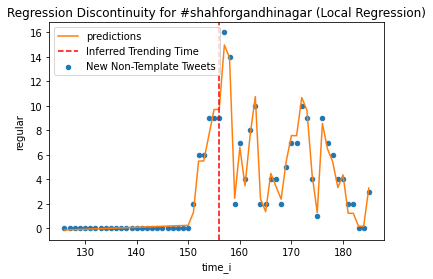

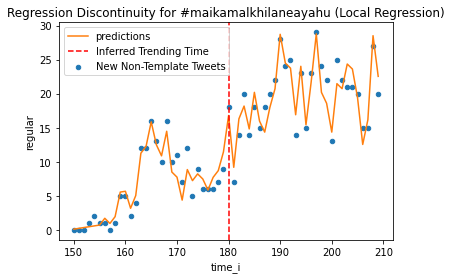

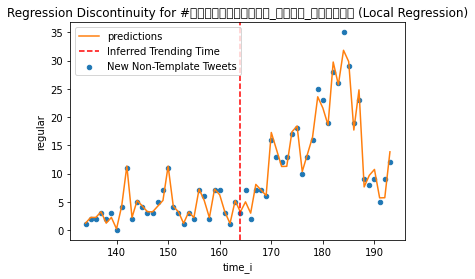

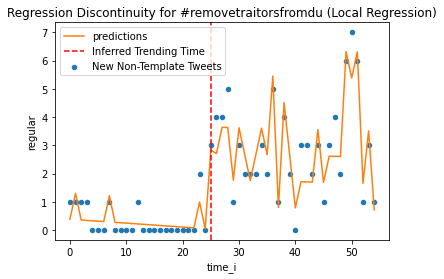

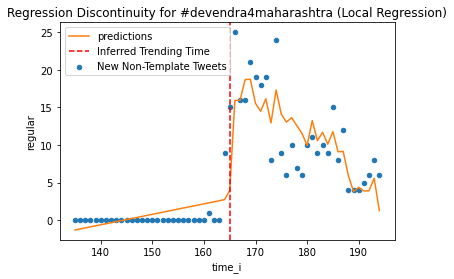

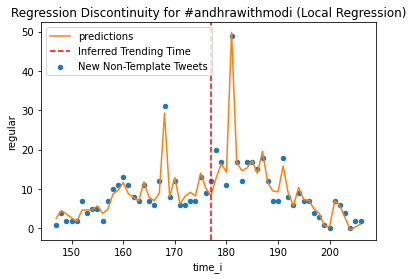

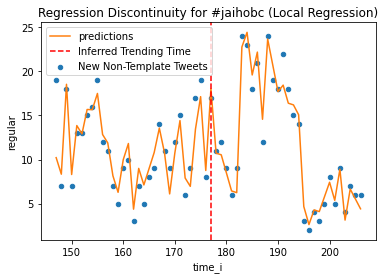

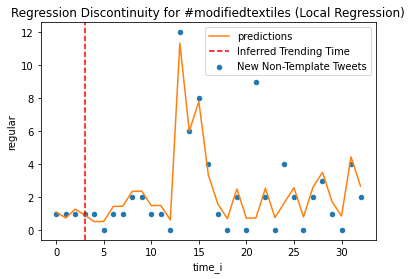

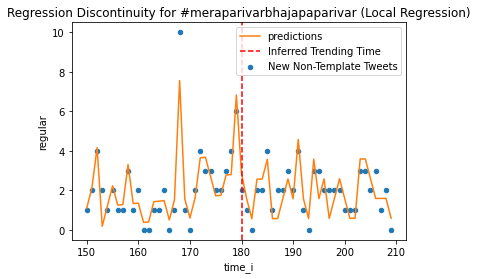

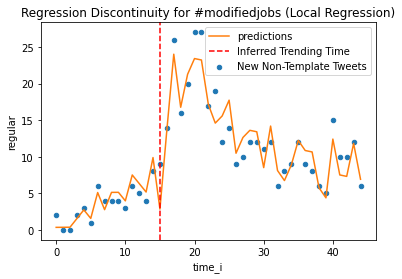

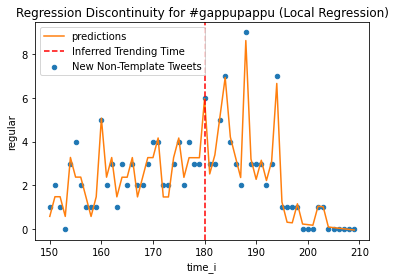

In [108]:
meta_res = []
for hashtag, tweet_dict in campaigns.items():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        res = trending.run_statistics(
            *build_df(hashtag, tweet_dict, exposures, time_bin='2Min'), 
                                      periods=(30,30), plot=True)
        meta_res.append(pd.concat({hashtag: res}, names=['Hashtag']))


Text(0, 0.5, '')

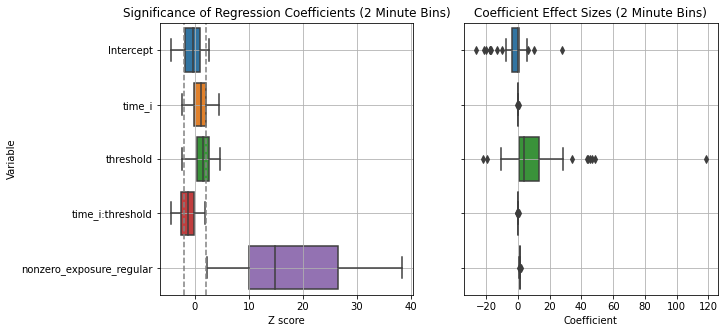

In [109]:
df = pd.concat(meta_res)
df['Trial'] = df.index.get_level_values(1)
df['Variable'] = df.index.get_level_values(2)
df['Hashtag'] = df.index.get_level_values(0)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10,5))

sns.boxplot(x='z', y='Variable', data=df, ax=ax[0], showfliers=False)
ax[0].grid(True)
ax[0].set_title('Significance of Regression Coefficients (2 Minute Bins)')
ax[0].set_xlabel('Z score')
# plt.ylabel('Model Parameter')
ax[0].axvline(2, color='grey', ls='--')
ax[0].axvline(-2, color='grey', ls='--')

sns.boxplot(x='coef', y='Variable', data=df, ax=ax[1])
ax[1].grid(True)
ax[1].set_title('Coefficient Effect Sizes (2 Minute Bins)')
ax[1].set_xlabel('Coefficient')
ax[1].set_ylabel('')

In [87]:
df.query('Variable == "nonzero_exposure_regular"').sort_values('z')

coef  \
Hashtag                    Trial                                         
pmkisan                    New Tweets nonzero_exposure_regular  1.7918   
copypastencp               New Tweets nonzero_exposure_regular  1.2399   
congressinsultsairforce    New Tweets nonzero_exposure_regular  1.0241   
आदर्शघोटाला_संघर्ष_यात्रा  New Tweets nonzero_exposure_regular  1.0314   
congresseurofighterscandal New Tweets nonzero_exposure_regular  0.9846   
...                                                                ...   
corruptcongressfearsdemo   New Tweets nonzero_exposure_regular  0.9767   
surgingsilk                New Tweets nonzero_exposure_regular  0.9979   
takingforwardhinducause    New Tweets nonzero_exposure_regular  0.9828   
badalrahihaikashi          New Tweets nonzero_exposure_regular  1.0103   
mizoramwithmodi            New Tweets nonzero_exposure_regular  1.0000   

                                                                     std err  \
Hashtag                    Trial                                               
pmkisan                    New Tweets nonzero_exposure_regular  4.950000e-01   
copypastencp               New Tweets nonzero_exposure_regular  2.990000e-01   
congressinsultsairforce    New Tweets nonzero_exposure_regular  1.740000e-01   
आदर्शघोटाला_संघर्ष_यात्रा  New Tweets nonzero_exposure_regular  1.440000e-01   
congresseurofighterscandal New Tweets nonzero_exposure_regular  1.200000e-01   
...                                                                      ...   
corruptcongressfearsdemo   New Tweets nonzero_exposure_regular  2.100000e-02   
surgingsilk                New Tweets nonzero_exposure_regular  2.000000e-02   
takingforwardhinducause    New Tweets nonzero_exposure_regular  1.900000e-02   
badalrahihaikashi          New Tweets nonzero_exposure_regular  1.300000e-02   
mizoramwithmodi            New Tweets nonzero_exposure_regular  8.990000e-16   

                                                                           z  \
Hashtag                    Trial                                               
pmkisan                    New Tweets nonzero_exposure_regular  3.622000e+00   
copypastencp               New Tweets nonzero_exposure_regular  4.149000e+00   
congressinsultsairforce    New Tweets nonzero_exposure_regular  5.893000e+00   
आदर्शघोटाला_संघर्ष_यात्रा  New Tweets nonzero_exposure_regular  7.150000e+00   
congresseurofighterscandal New Tweets nonzero_exposure_regular  8.199000e+00   
...                                                                      ...   
corruptcongressfearsdemo   New Tweets nonzero_exposure_regular  4.572500e+01   
surgingsilk                New Tweets nonzero_exposure_regular  5.038300e+01   
takingforwardhinducause    New Tweets nonzero_exposure_regular  5.232100e+01   
badalrahihaikashi          New Tweets nonzero_exposure_regular  8.069300e+01   
mizoramwithmodi            New Tweets nonzero_exposure_regular  1.110000e+15   

                                                                P>|z|  [0.025  \
Hashtag                    Trial                                                
pmkisan                    New Tweets nonzero_exposure_regular    0.0   0.822   
copypastencp               New Tweets nonzero_exposure_regular    0.0   0.654   
congressinsultsairforce    New Tweets nonzero_exposure_regular    0.0   0.683   
आदर्शघोटाला_संघर्ष_यात्रा  New Tweets nonzero_exposure_regular    0.0   0.749   
congresseurofighterscandal New Tweets nonzero_exposure_regular    0.0   0.749   
...                                                               ...     ...   
corruptcongressfearsdemo   New Tweets nonzero_exposure_regular    0.0   0.935   
surgingsilk                New Tweets nonzero_exposure_regular    0.0   0.959   
takingforwardhinducause    New Tweets nonzero_exposure_regular    0.0   0.946   
badalrahihaikashi          New Tweets nonzero_exposure_regular    0.0   0.986   
mizoramwithmodi            New Tweets nonzero_exp

## Combining All Hashtags and Normalizing Time

$Y_{iht} = \gamma_{h} + \lambda_t + \beta D_{ht} + \epsilon_{iht}$

# Robustness to Binning

## 1 Minute Bins

In [136]:
dfs = []
for hashtag, tweet_dict in campaigns.items():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        temp, _ = build_df(hashtag, tweet_dict, exposures, normalize_time=True, time_bin='1Min')
        temp = temp.assign(threshold=(temp.time > 0).astype(int))
        temp['hashtag'] = hashtag
        dfs.append(temp)
        
panel_df = pd.concat(dfs)

KeyboardInterrupt: 

In [117]:
query = panel_df.query('time >= -60 & time <= 60').fillna(0)
# convert hashtags to numeric
query.hashtag = pd.Categorical(query.hashtag).codes
query = query.dropna()
mod = smf.ols("regular ~ time*threshold + C(hashtag) + nonzero_exposure_regular", data=query).fit(cov_type='cluster', cov_kwds={'groups': query['hashtag']} )
temp_df = pd.read_html(mod.summary().tables[1].as_html(), index_col=0, header=0)[0]
temp_df = temp_df.loc[~temp_df.index.str.startswith('C', na=False)]
trending.highlight_reg_output(temp_df)
print(query.hashtag.max())

63


## Bins of Size 5

In [120]:
dfs = []
for hashtag, tweet_dict in campaigns.items():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        temp, _ = build_df(hashtag, tweet_dict, exposures, normalize_time=True, time_bin='5Min')
        temp = temp.assign(threshold=(temp.time > 0).astype(int))
        temp['hashtag'] = hashtag
        dfs.append(temp)
        
panel_df = pd.concat(dfs)

In [121]:
query = panel_df.query('time >= -60 & time <= 60').fillna(0)
# convert hashtags to numeric
query.hashtag = pd.Categorical(query.hashtag).codes
query = query.dropna()
mod = smf.ols("regular ~ time*threshold + C(hashtag) + nonzero_exposure_regular", data=query).fit(cov_type='cluster', cov_kwds={'groups': query['hashtag']} )
temp_df = pd.read_html(mod.summary().tables[1].as_html(), index_col=0, header=0)[0]
temp_df = temp_df.loc[~temp_df.index.str.startswith('C', na=False)]
trending.highlight_reg_output(temp_df)
print(query.hashtag.max())

63


## Bins of Size 10

In [122]:
dfs = []
for hashtag, tweet_dict in campaigns.items():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        temp, _ = build_df(hashtag, tweet_dict, exposures, normalize_time=True, time_bin='10Min')
        temp = temp.assign(threshold=(temp.time > 0).astype(int))
        temp['hashtag'] = hashtag
        dfs.append(temp)
        
panel_df = pd.concat(dfs)

In [123]:
query = panel_df.query('time >= -60 & time <= 60').fillna(0)
# convert hashtags to numeric
query.hashtag = pd.Categorical(query.hashtag).codes
query = query.dropna()
mod = smf.ols("regular ~ time*threshold + C(hashtag) + nonzero_exposure_regular", data=query).fit(cov_type='cluster', cov_kwds={'groups': query['hashtag']} )
temp_df = pd.read_html(mod.summary().tables[1].as_html(), index_col=0, header=0)[0]
temp_df = temp_df.loc[~temp_df.index.str.startswith('C', na=False)]
trending.highlight_reg_output(temp_df)
print(query.hashtag.max())

63


# Choosing Trending Time as Latest Possible Time

## Bins of Size 1

In [124]:
dfs = []
for hashtag, tweet_dict in campaigns.items():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        temp, _ = build_df(hashtag, tweet_dict, exposures, normalize_time=True, time_bin='1Min', 
                           cutoff_choice='latest')
        temp = temp.assign(threshold=(temp.time > 0).astype(int))
        temp['hashtag'] = hashtag
        dfs.append(temp)
        
panel_df = pd.concat(dfs)

In [125]:
query = panel_df.query('time >= -60 & time <= 60').fillna(0)
# convert hashtags to numeric
query.hashtag = pd.Categorical(query.hashtag).codes
query = query.dropna()
mod = smf.ols("regular ~ time*threshold + C(hashtag) + nonzero_exposure_regular", data=query).fit(cov_type='cluster', cov_kwds={'groups': query['hashtag']} )
temp_df = pd.read_html(mod.summary().tables[1].as_html(), index_col=0, header=0)[0]
temp_df = temp_df.loc[~temp_df.index.str.startswith('C', na=False)]
trending.highlight_reg_output(temp_df)
print(query.hashtag.max())

63


## Bins of Size 5

In [126]:
dfs = []
for hashtag, tweet_dict in campaigns.items():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        temp, _ = build_df(hashtag, tweet_dict, exposures, normalize_time=True, time_bin='5Min',
                          cutoff_choice='latest')
        temp = temp.assign(threshold=(temp.time > 0).astype(int))
        temp['hashtag'] = hashtag
        dfs.append(temp)
        
panel_df = pd.concat(dfs)

In [127]:
query = panel_df.query('time >= -60 & time <= 60').fillna(0)
# convert hashtags to numeric
query.hashtag = pd.Categorical(query.hashtag).codes
query = query.dropna()
mod = smf.ols("regular ~ time*threshold + C(hashtag) + nonzero_exposure_regular", data=query).fit(cov_type='cluster', cov_kwds={'groups': query['hashtag']} )
temp_df = pd.read_html(mod.summary().tables[1].as_html(), index_col=0, header=0)[0]
temp_df = temp_df.loc[~temp_df.index.str.startswith('C', na=False)]
trending.highlight_reg_output(temp_df)
print(query.hashtag.max())

63


## Bins of Size 10

In [128]:
dfs = []
for hashtag, tweet_dict in campaigns.items():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        temp, _ = build_df(hashtag, tweet_dict, exposures, normalize_time=True, time_bin='10Min', 
                          cutoff_choice='latest')
        temp = temp.assign(threshold=(temp.time > 0).astype(int))
        temp['hashtag'] = hashtag
        dfs.append(temp)
        
panel_df = pd.concat(dfs)

In [129]:
query = panel_df.query('time >= -60 & time <= 60').fillna(0)
# convert hashtags to numeric
query.hashtag = pd.Categorical(query.hashtag).codes
query = query.dropna()
mod = smf.ols("regular ~ time*threshold + C(hashtag) + nonzero_exposure_regular", data=query).fit(cov_type='cluster', cov_kwds={'groups': query['hashtag']} )
temp_df = pd.read_html(mod.summary().tables[1].as_html(), index_col=0, header=0)[0]
temp_df = temp_df.loc[~temp_df.index.str.startswith('C', na=False)]
trending.highlight_reg_output(temp_df)
print(query.hashtag.max())

63


# Earliest Cutoff Time

## Bins of Size 1

In [130]:
dfs = []
for hashtag, tweet_dict in campaigns.items():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        temp, _ = build_df(hashtag, tweet_dict, exposures, normalize_time=True, time_bin='1Min', 
                           cutoff_choice='earliest')
        temp = temp.assign(threshold=(temp.time > 0).astype(int))
        temp['hashtag'] = hashtag
        dfs.append(temp)
        
panel_df = pd.concat(dfs)

In [131]:
query = panel_df.query('time >= -60 & time <= 60').fillna(0)
# convert hashtags to numeric
query.hashtag = pd.Categorical(query.hashtag).codes
query = query.dropna()
mod = smf.ols("regular ~ time*threshold + C(hashtag) + nonzero_exposure_regular", data=query).fit(cov_type='cluster', cov_kwds={'groups': query['hashtag']} )
temp_df = pd.read_html(mod.summary().tables[1].as_html(), index_col=0, header=0)[0]
temp_df = temp_df.loc[~temp_df.index.str.startswith('C', na=False)]
trending.highlight_reg_output(temp_df)
print(query.hashtag.max())

63


## Bins of Size 5

In [132]:
dfs = []
for hashtag, tweet_dict in campaigns.items():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        temp, _ = build_df(hashtag, tweet_dict, exposures, normalize_time=True, time_bin='5Min',
                          cutoff_choice='earliest')
        temp = temp.assign(threshold=(temp.time > 0).astype(int))
        temp['hashtag'] = hashtag
        dfs.append(temp)
        
panel_df = pd.concat(dfs)

In [133]:
query = panel_df.query('time >= -60 & time <= 60').fillna(0)
# convert hashtags to numeric
query.hashtag = pd.Categorical(query.hashtag).codes
query = query.dropna()
mod = smf.ols("regular ~ time*threshold + C(hashtag) + nonzero_exposure_regular", data=query).fit(cov_type='cluster', cov_kwds={'groups': query['hashtag']} )
temp_df = pd.read_html(mod.summary().tables[1].as_html(), index_col=0, header=0)[0]
temp_df = temp_df.loc[~temp_df.index.str.startswith('C', na=False)]
trending.highlight_reg_output(temp_df)
print(query.hashtag.max())

63


## Bins of Size 10

In [134]:
dfs = []
for hashtag, tweet_dict in campaigns.items():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        temp, _ = build_df(hashtag, tweet_dict, exposures, normalize_time=True, time_bin='10Min', 
                          cutoff_choice='earliest')
        temp = temp.assign(threshold=(temp.time > 0).astype(int))
        temp['hashtag'] = hashtag
        dfs.append(temp)
        
panel_df = pd.concat(dfs)

In [135]:
query = panel_df.query('time >= -60 & time <= 60').fillna(0)
# convert hashtags to numeric
query.hashtag = pd.Categorical(query.hashtag).codes
query = query.dropna()
mod = smf.ols("regular ~ time*threshold + C(hashtag) + nonzero_exposure_regular", data=query).fit(cov_type='cluster', cov_kwds={'groups': query['hashtag']} )
temp_df = pd.read_html(mod.summary().tables[1].as_html(), index_col=0, header=0)[0]
temp_df = temp_df.loc[~temp_df.index.str.startswith('C', na=False)]
trending.highlight_reg_output(temp_df)
print(query.hashtag.max())

63


# Robustness to Before/After Period

In [137]:
dfs = []
for hashtag, tweet_dict in campaigns.items():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        temp, _ = build_df(hashtag, tweet_dict, exposures, normalize_time=True, time_bin='5Min')
        temp = temp.assign(threshold=(temp.time > 0).astype(int))
        temp['hashtag'] = hashtag
        dfs.append(temp)
        
panel_df = pd.concat(dfs)

In [138]:
query = panel_df.query('time >= -60 & time <= 60').fillna(0)
# convert hashtags to numeric
query.hashtag = pd.Categorical(query.hashtag).codes
query = query.dropna()
mod = smf.ols("regular ~ time*threshold + C(hashtag) + nonzero_exposure_regular", data=query).fit(cov_type='cluster', cov_kwds={'groups': query['hashtag']} )
temp_df = pd.read_html(mod.summary().tables[1].as_html(), index_col=0, header=0)[0]
temp_df = temp_df.loc[~temp_df.index.str.startswith('C', na=False)]
trending.highlight_reg_output(temp_df)
print(query.hashtag.max())

63


In [139]:
query = panel_df.query('time >= -120 & time <= 120').fillna(0)
# convert hashtags to numeric
query.hashtag = pd.Categorical(query.hashtag).codes
query = query.dropna()
mod = smf.ols("regular ~ time*threshold + C(hashtag) + nonzero_exposure_regular", data=query).fit(cov_type='cluster', cov_kwds={'groups': query['hashtag']} )
temp_df = pd.read_html(mod.summary().tables[1].as_html(), index_col=0, header=0)[0]
temp_df = temp_df.loc[~temp_df.index.str.startswith('C', na=False)]
trending.highlight_reg_output(temp_df)
print(query.hashtag.max())

63


In [140]:
query = panel_df.query('time >= -30 & time <= 30').fillna(0)
# convert hashtags to numeric
query.hashtag = pd.Categorical(query.hashtag).codes
query = query.dropna()
mod = smf.ols("regular ~ time*threshold + C(hashtag) + nonzero_exposure_regular", data=query).fit(cov_type='cluster', cov_kwds={'groups': query['hashtag']} )
temp_df = pd.read_html(mod.summary().tables[1].as_html(), index_col=0, header=0)[0]
temp_df = temp_df.loc[~temp_df.index.str.startswith('C', na=False)]
trending.highlight_reg_output(temp_df)
print(query.hashtag.max())

63


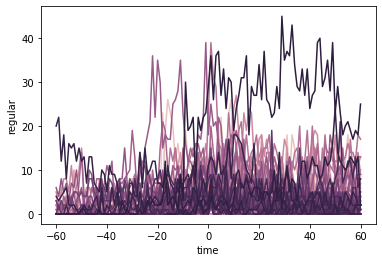

In [118]:
ax = sns.lineplot(x='time', y='regular', hue='hashtag', data=query, legend=False)
# query.assign(predictions=mod.fittedvalues).plot(x="time", y="predictions", ax=ax, color="C1")
# plt.axvline(0, color='r', ls='--', label='Inferred Trending Time')
# plt.title(f"Panel Data Regression");

In [ ]:
query = panel_df.query('time > -60 & time < 60').fillna(0)
# convert hashtags to numeric
query.hashtag = pd.Categorical(query.hashtag).codes
query = query.dropna()
mod = smf.ols("regular ~ time*threshold + C(hashtag) + nonzero_exposure_regular", data=query).fit(cov_type='cluster', cov_kwds={'groups': query['hashtag']} )
mod.summary()

In [218]:
query = panel_df.query('time > -60 & time < 60').fillna(0)
# convert hashtags to numeric
query.hashtag = pd.Categorical(query.hashtag).codes
query = query.dropna()
mod = smf.ols("regular ~ time*threshold + C(hashtag) + nonzero_exposure_regular", data=query).fit(
    cov_type='HAC',cov_kwds={'maxlags':1})
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                regular   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     22.27
Date:                Mon, 11 Jan 2021   Prob (F-statistic):          7.88e-169
Time:                        15:15:55   Log-Likelihood:                -5188.5
No. Observations:                1347   AIC:                         1.051e+04
Df Residuals:                    1279   BIC:                         1.087e+04
Df Model:                          67                                         
Covariance Type:                  HAC                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.4053      1.445      0.280      0.779      -2.427       3.238
C(hashtag)[T.1]             11.3350      2.582      4.391      0.000       6.275      16.395
C(hashtag)[T.2]              2.0640      1.346      1.533      0.125      -0.575       4.703
C(hashtag)[T.3]              1.5154      1.639      0.924      0.355      -1.698       4.729
C(hashtag)[T.4]             28.6981      4.504      6.371      0.000      19.870      37.526
C(hashtag)[T.5]              7.2965      1.819      4.011      0.000       3.731      10.862
C(hashtag)[T.6]              0.0948      1.481      0.064      0.949      -2.808       2.998
C(hashtag)[T.7]              1.9834      1.603      1.237      0.216      -1.159       5.126
C(hashtag)[T.8]              5.6624      1.629      3.476      0.001       2.469       8.855
C(hashtag)[T.9]             -1.1223      1.831     -0.613      0.540      -4.711       2.466
C(hashtag)[T.10]            -0.6327      1.822     -0.347      0.728      -4.204       2.938
C(hashtag)[T.11]            -3.4677      1.281     -2.706      0.007      -5.979      -0.956
C(hashtag)[T.12]            -1.1939      1.464     -0.816      0.415      -4.063       1.675
C(hashtag)[T.13]             6.9267      1.968      3.520      0.000       3.069      10.784
C(hashtag)[T.14]            -3.1721      4.231     -0.750      0.453     -11.464       5.120
C(hashtag)[T.15]             0.1178      1.569      0.075      0.940      -2.957       3.192
C(hashtag)[T.16]             4.4699      2.073      2.156      0.031       0.406       8.534
C(hashtag)[T.17]             3.4553      1.681      2.055      0.040       0.160       6.750
C(hashtag)[T.18]             7.4026      1.620      4.570      0.000       4.228      10.577
C(hashtag)[T.19]             0.1612      1.705      0.095      0.925      -3.181       3.504
C(hashtag)[T.20]            19.2375      6.740      2.854      0.004       6.028      32.447
C(hashtag)[T.21]             4.3747      2.096      2.088      0.037       0.268       8.482
C(hashtag)[T.22]            17.3390      3.314      5.231      0.000      10.843      23.835
C(hashtag)[T.23]             1.4382      1.670      0.861      0.389      -1.835       4.711
C(hashtag)[T.24]             2.4255      1.481      1.638      0.101      -0.477       5.328
C(hashtag)[T.25]             5.6599      2.767      2.046      0.041       0.237      11.083
C(hashtag)[T.26]            13.7801      3.660      3.765      0.000       6.606      20.954
C(hashtag)[T.27]             0.5726      1.353      0.423      0.672      -2.079       3.224
C(hashtag)[T.28]            22.0277      4.550      4.841      0.000      13.110      30.946
C(hashtag)[T.29]            -0.0420      1.485     -0.028      0.977      -2.952       2.869
C(hashtag)[T.3

In [117]:
len(exposures.keys())

68

In [131]:
x.columns

Index(['template', 'template_retweet', 'regular', 'regular_retweet',
       'zero_exposure_regular', 'nonzero_exposure_regular', 'time', 'time_i',
       'time_i2', 'total_engagement', 'rt_engagement'],
      dtype='object')

In [163]:
def plot_all_event_study(quantiles=(.1,.99), time_bin='5Min'):
    # plot everything
    fig, axs = plt.subplots(2, 1, figsize=(14,9))
    for hashtag, tweet_dict in campaigns.items():
        try:
            temp, _ = build_df(hashtag, tweet_dict, normalize_time=True)
            axs[0].plot(temp.index, temp.zero_exposure_regular,
                    alpha=.4)
            axs[1].plot(temp.index, temp.total_engagement, alpha=.4)

        except Exception as e:
            print(hashtag, 'did not work')
            print(e)

    axs[1].set_xlabel('Minutes Since Trending', fontsize=18)
    axs[0].set_ylabel('Tweet volume', fontsize=16)
    axs[1].set_ylabel('Tweet volume', fontsize=16)
    axs[0].set_xlim(-100, 200)
    axs[1].set_xlim(-100, 200)
    axs[0].set_title('Zero Exposure Tweets')
    axs[1].set_title('Total Engagement')
    axs[0].grid()
    axs[1].grid()

bogibeelbridge did not work
'bogibeelbridge'
hooghly_chalo did not work
'datetime' is not in list
goodgovernanceday did not work
'goodgovernanceday'
congressframedamitshah did not work
'datetime' is not in list
mainbhichowkidar did not work
'mainbhichowkidar'
congressagainstnationalsecurity did not work
'datetime' is not in list
bjpvijaysankalpbikerally did not work
'bjpvijaysankalpbikerally'
bjpkamaljyoti did not work
'bjpkamaljyoti'
modiagain2019 did not work
'modiagain2019'
armedforcesflagday did not work
'armedforcesflagday'
nris4modi did not work
'datetime' is not in list


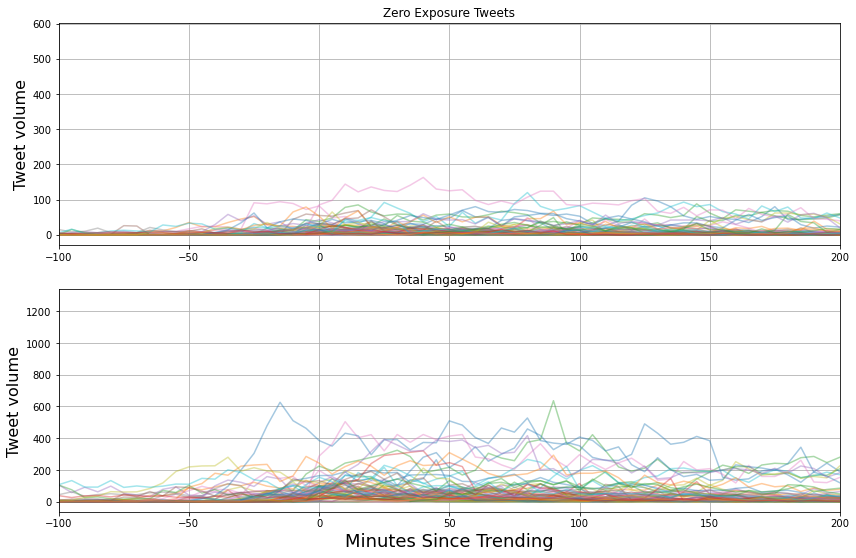

In [164]:
plot_all_event_study()

### Scratch

coef  std err      z  P>|z|  [0.025  \
Trial                                                                         
New Tweets Intercept                 -7.3849    5.489 -1.345  0.178 -18.142   
           time_i                     0.1533    0.110  1.389  0.165  -0.063   
           threshold                 73.5129   26.089  2.818  0.005  22.379   
           time_i:threshold          -1.1296    0.410 -2.757  0.006  -1.933   
           nonzero_exposure_regular   0.8542    0.161  5.314  0.000   0.539   

                                      0.975]  
Trial                                         
New Tweets Intercept                   3.373  
           time_i                      0.370  
           threshold                 124.647  
           time_i:threshold           -0.326  
           nonzero_exposure_regular    1.169

coef  std err      z  P>|z|  [0.025   0.975]
Trial                                                                       
New Tweets Intercept         -4.9670    3.682 -1.349  0.177 -12.184    2.250
           time_i             0.1044    0.074  1.414  0.157  -0.040    0.249
           threshold         66.9489   24.536  2.729  0.006  18.860  115.038
           time_i:threshold  -1.0317    0.382 -2.703  0.007  -1.780   -0.284

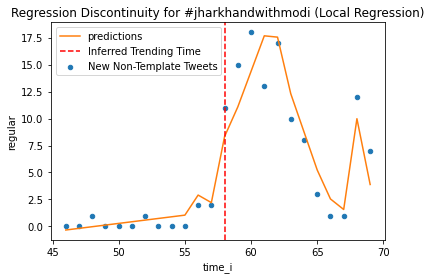

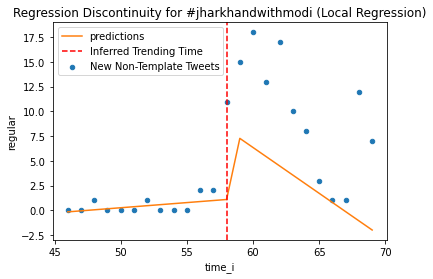

In [146]:
x, y = build_df(hashtag, tweets, exposures, time_bin='5Min', plot=False, cutoff_choice='best')

res = trending.run_statistics(x, y, periods=(12, 12), plot=True)
display(res)

res = trending.run_statistics(x, y, periods=(12, 12),plot=True,
                             model_str="zero_exposure_regular~time_i*threshold")
display(res)

In [169]:
ht_sizes = {}
for k,v in campaigns.items():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        ht_sizes[k] = len(v)

In [168]:
coef_sizes = dict(zip(list(df.query('Variable == "threshold"').Hashtag), 
                      list(df.query('Variable == "threshold"').coef)))

In [175]:
xs, ys = [], []
for k in coef_sizes.keys():
    xs.append(ht_sizes[k])
    ys.append(coef_sizes[k])

Text(0.5, 1.0, 'Relationship Between Trending Boost and Total Hashtag Use')

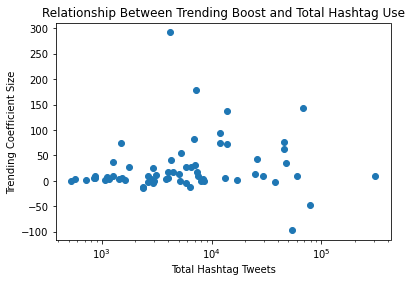

In [182]:
plt.scatter(xs, ys)
plt.xlabel('Total Hashtag Tweets')
plt.ylabel('Trending Coefficient Size')
plt.xscale('log')
plt.title('Relationship Between Trending Boost and Total Hashtag Use')

(array([63.,  9.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([5.240000e+02, 4.486140e+04, 8.919880e+04, 1.335362e+05,
        1.778736e+05, 2.222110e+05, 2.665484e+05, 3.108858e+05,
        3.552232e+05, 3.995606e+05, 4.438980e+05, 4.882354e+05,
        5.325728e+05, 5.769102e+05, 6.212476e+05, 6.655850e+05,
        7.099224e+05, 7.542598e+05, 7.985972e+05, 8.429346e+05,
        8.872720e+05]),
 <BarContainer object of 20 artists>)

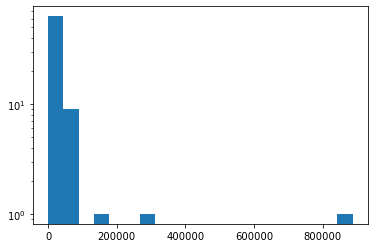

In [153]:
plt.hist(temp_list, bins=20, log=True)

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge linearmodels

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /home/jschless/.conda/envs/gt:

The following NEW packages will be INSTALLED:

    linearmodels:    4.18-py38h709712a_0  conda-forge
    mypy_extensions: 0.4.3-py38h578d9bd_3 conda-forge
    property-cached: 1.6.4-py_0           conda-forge
    property_cached: 1.6.4-0              conda-forge

The following packages will be UPDATED:

    libstdcxx-ng:    9.2.0-hdf63c60_2     conda-forge --> 9.3.0-h6de172a_18 conda-forge

libstdcxx-ng-9 100% |################################| Time: 0:00:00  34.20 MB/s
mypy_extension 100% |################################| Time: 0:00:00   5.96 MB/s
property-cache 100% |################################| Time: 0:00:00   6.53 MB/s
property_cache 100% |################################| Time: 0:00:00   2.73 MB/s
linearmodels-4 100% |################################| Time: 0:00:00  34.46 MB/s
